<a href="https://colab.research.google.com/github/KGuruPrasad94/DS_challenge_C1/blob/main/DS_challenge_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capital One - Data Science Challenge**

# **1.Import and Setup**

In [1]:
# Import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import statsmodels.api as sm
import panel as pn
import plotly.graph_objects as go
import scipy as sp
import os
import random
import requests
import zipfile
import io
from datetime import timedelta

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# setting display settings to view full df
pd.set_option('display.max_columns', None)

# **2. Data Load and Exploration**

In [4]:
# load data from github
url = "https://github.com/CapitalOneRecruiting/DS/raw/refs/heads/master/transactions.zip"

response = requests.get(url)
response.raise_for_status()

In [5]:
# unzip file and read with pandas
with zipfile.ZipFile(io.BytesIO(response.content)) as myzip:
    myzip.extractall()

    with myzip.open("transactions.txt") as file:
        df = pd.read_json(file, lines=True)

In [6]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


In [7]:
# inspecting shape of df
print("Dataset Dimensions: {} x {}".format(df.shape[0], df.shape[1]))

Dataset Dimensions: 786363 x 29


In [8]:
# replacing white space with nan
df = df.replace(r'^\s*$', np.nan, regex=True)

In [9]:
# view dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [10]:
# generate descriptive statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
accountNumber,786363.0,NaN,NaN,NaN,537232599.461703,255421092.307358,100088067.0,330133277.0,507456073.0,767620004.0,999389635.0
customerId,786363.0,NaN,NaN,NaN,537232599.461703,255421092.307358,100088067.0,330133277.0,507456073.0,767620004.0,999389635.0
creditLimit,786363.0,NaN,NaN,NaN,10759.464459,11636.17489,250.0,5000.0,7500.0,15000.0,50000.0
availableMoney,786363.0,NaN,NaN,NaN,6250.725369,8880.783989,-1005.63,1077.42,3184.86,7500.0,50000.0
transactionDateTime,786363,776637,2016-12-25T14:04:15,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transactionAmount,786363.0,NaN,NaN,NaN,136.985791,147.725569,0.0,33.65,87.9,191.48,2011.54
merchantName,786363,2490,Uber,25613,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acqCountry,781801,4,US,774709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
merchantCountryCode,785639,4,US,778511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
posEntryMode,782309,5,05,315035,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# null values in each column
df.isnull().sum()

,0
accountNumber,0
customerId,0
creditLimit,0
availableMoney,0
transactionDateTime,0
transactionAmount,0
merchantName,0
acqCountry,4562
merchantCountryCode,724
posEntryMode,4054


In [12]:
#checking unique accounts
print(f"Number of unique account numbers: {df.accountNumber.nunique()}")

Number of unique account numbers: 5000


In [13]:
#checking unique customers
print(f"Number of unique account numbers: {df.customerId.nunique()}")

Number of unique account numbers: 5000


In [14]:
# checking if all account number = customer id
df['accountNumber'].equals(df['customerId'])

True

In [15]:
#checking for duplicate values
print(f"Number of duplicate records: {df.duplicated().sum()}")

Number of duplicate records: 0


**Initial observations**



1.   6 columns in the datasets doesn't contain any values and there are 5 additional columns with at least 1 null value.
2.   Account number and Customer Id column have 1:1 mapping (ie- they are same) and seems to be redundant.
3. No duplicated rows present in data



# **3. Exploratory Data Analysis (EDA) and Data Inspection**

**3.1 Inspecting the distribution of currency columns**

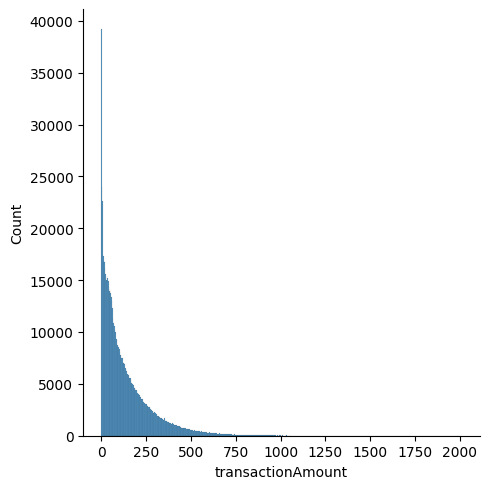

In [17]:
# checking the distribution of "transactionAmount"
sns.displot(df['transactionAmount'])
plt.show()

**Box Plot - Transaction amount**



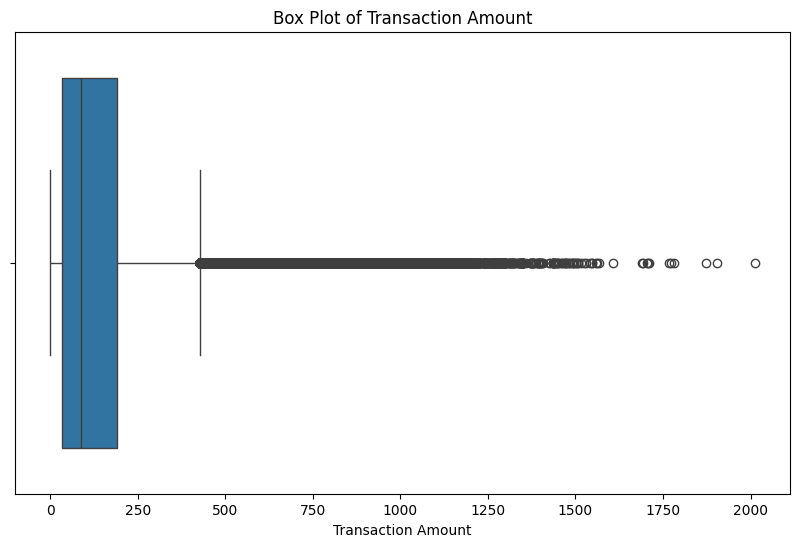

In [18]:
# boxplot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['transactionAmount'])
plt.title('Box Plot of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.show()


**Observations:**
1.   Histogram shows a right skewed distribution which is expected in credit card transaction data.
2.   Most transaction amounts are small and are clustered near zero and also has a large tail.

**Approach:**

Need to apply scaling/transformation methods to reduce skewness and bias in the model

array([[<Axes: title={'center': 'creditLimit'}>,
        <Axes: title={'center': 'availableMoney'}>],
       [<Axes: title={'center': 'transactionAmount'}>,
        <Axes: title={'center': 'currentBalance'}>]], dtype=object)

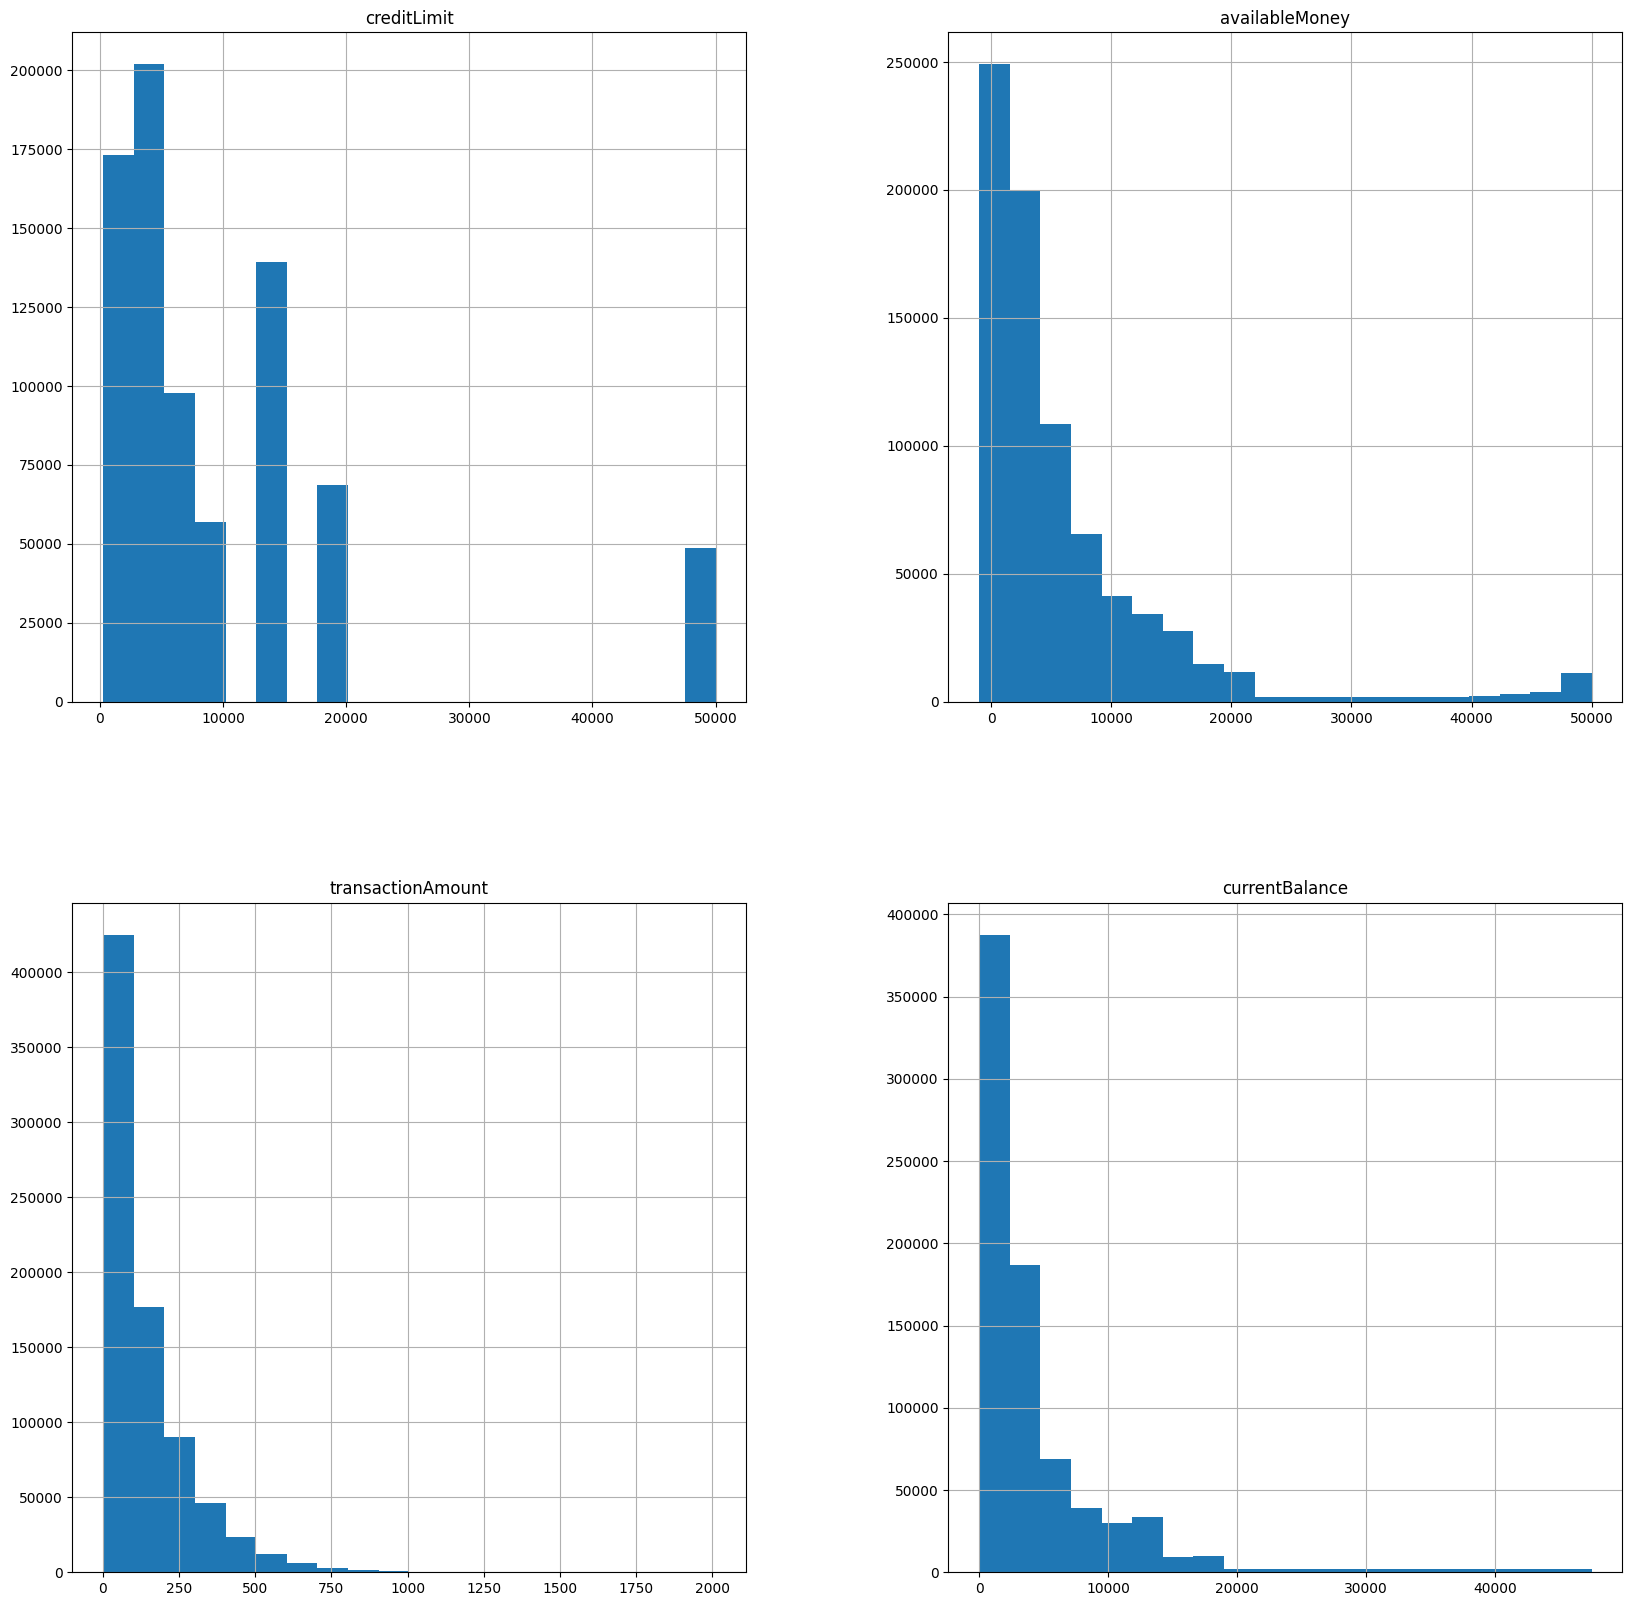

In [16]:
# checking the distribution of currency columns
df[['creditLimit','availableMoney','transactionAmount','currentBalance']].hist(bins = 20 , figsize= (20,20))

In [20]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

**3.2 Inspecting Location based columns**

In [21]:
#inspecting "acqCountry"
df['acqCountry'].value_counts()

,count
acqCountry,
US,774709
MEX,3130
CAN,2424
PR,1538


In [22]:
#inspecting "merchantCountryCode"
df['merchantCountryCode'].value_counts()

,count
merchantCountryCode,
US,778511
MEX,3143
CAN,2426
PR,1559


In [23]:
# checking the count of equal values in "acqCountry" and "merchantCountryCode" column
equal_count = (df['acqCountry'] == df['merchantCountryCode']).sum()
equal_count

781731

In [24]:
# checking the count of unequal values in "acqCountry" and "merchantCountryCode" column
unequal_count = (df['acqCountry'] != df['merchantCountryCode']).sum()
unequal_count

4632

In [25]:
# calculating fraud rate for each "merchantCountryCode"

country_fraud_summary = df.groupby('merchantCountryCode').agg(
    total_transactions=('isFraud', 'count'),
    total_fraud=('isFraud', 'sum')
)

country_fraud_summary['fraud_rate'] = (country_fraud_summary['total_fraud'] / country_fraud_summary['total_transactions'])*100
country_fraud_summary

,total_transactions,total_fraud,fraud_rate
merchantCountryCode,,,
CAN,2426,56,2.308326
MEX,3143,64,2.036271
PR,1559,27,1.731879
US,778511,12188,1.565553


**Observations:**



1.   Most of the values in Merchant country Code and Acq country seems to match, indicating most of the transactions are local transactions.
2.   Some of values in both columns doesn't match which indicates certain transactions could be cross country / international transactions. However, these columns have null values which could increase the number of mismatches.
3. Countries like Canada and Mexico has a higher fraud rate.



**3.3 Inspecting Merchant Category**

In [26]:
# unique merchantCategoryCode
print(f"Number of unique Merchant Categories: {df['merchantCategoryCode'].nunique()}")

Number of unique Merchant Categories: 19


In [27]:
# calculating fraud rate and total transaction volume for each "merchantCategoryCode"
mc_fraud_summary = df.groupby('merchantCategoryCode').agg(
    total_transactions=('isFraud', 'count'),
    total_fraud=('isFraud', 'sum')
)

mc_fraud_summary['fraud_rate'] = (mc_fraud_summary['total_fraud'] / mc_fraud_summary['total_transactions'])*100
mc_fraud_summary = mc_fraud_summary.reset_index()
mc_fraud_summary = mc_fraud_summary.sort_values(by='total_transactions', ascending=False)
mc_fraud_summary = pd.DataFrame(mc_fraud_summary)
mc_fraud_summary

,merchantCategoryCode,total_transactions,total_fraud,fraud_rate
14,online_retail,202156,4938,2.442668
4,fastfood,112138,1074,0.957748
3,entertainment,80098,961,1.199780
5,food,75490,1014,1.343224
13,online_gifts,66238,1606,2.424590
17,rideshare,51136,1272,2.487484
11,hotels,34097,250,0.733202
7,fuel,23910,0,0.000000
18,subscriptions,22901,216,0.943190
1,auto,21651,273,1.260912


Text(0, 0.5, 'MerchantCategory')

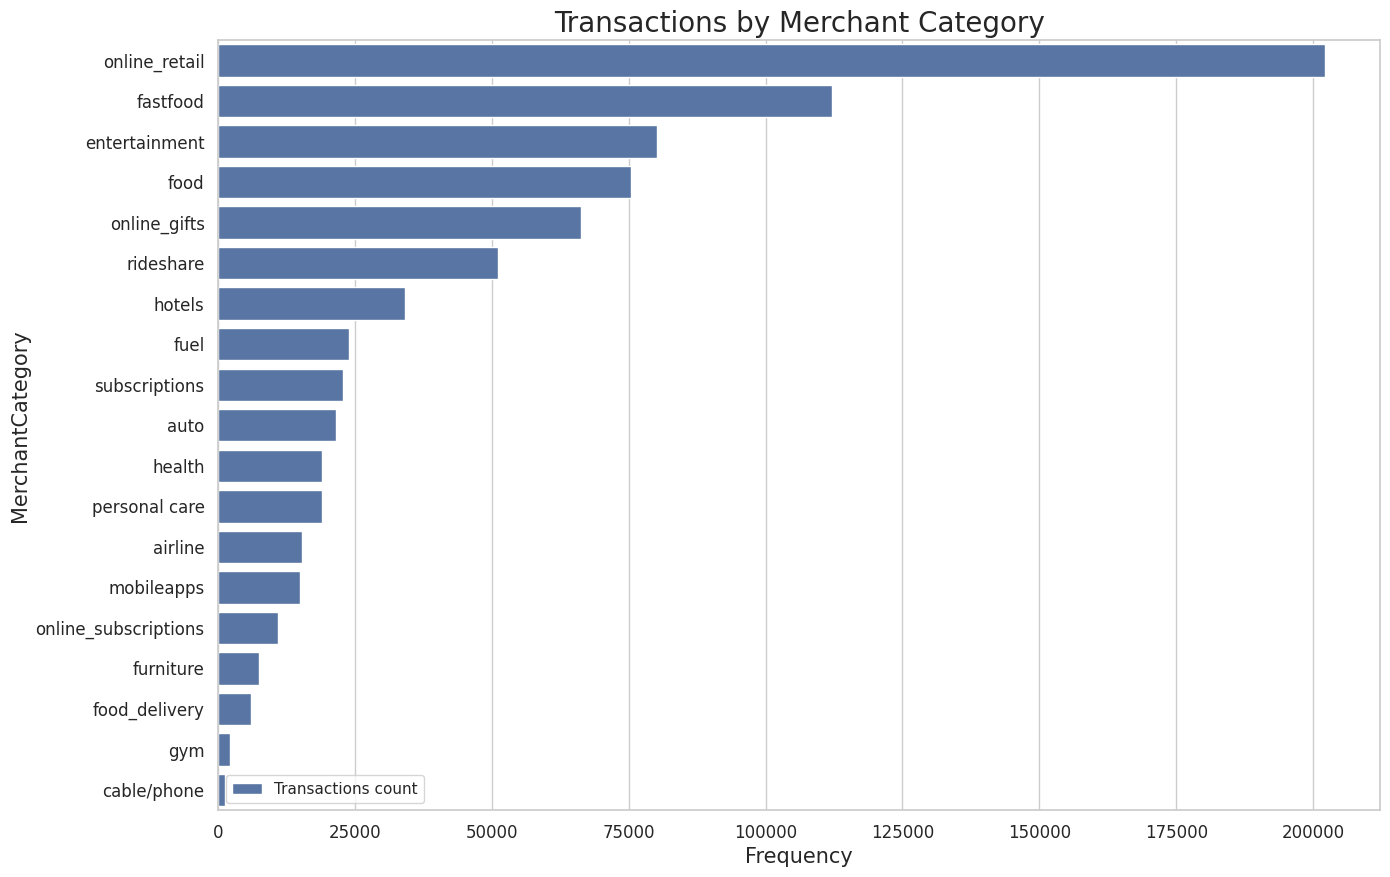

In [28]:
# bar plot: transaction volume by Merchant Category

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# plotting a bar plot
bar1 = sns.barplot(y="merchantCategoryCode", x="total_transactions", data=mc_fraud_summary, label="Transactions count")

# formatting tick size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# setting title and label
plt.title("Transactions by Merchant Category", loc='center',fontsize=20)
plt.xlabel('Frequency',fontsize=15)
plt.ylabel('MerchantCategory',fontsize=15)

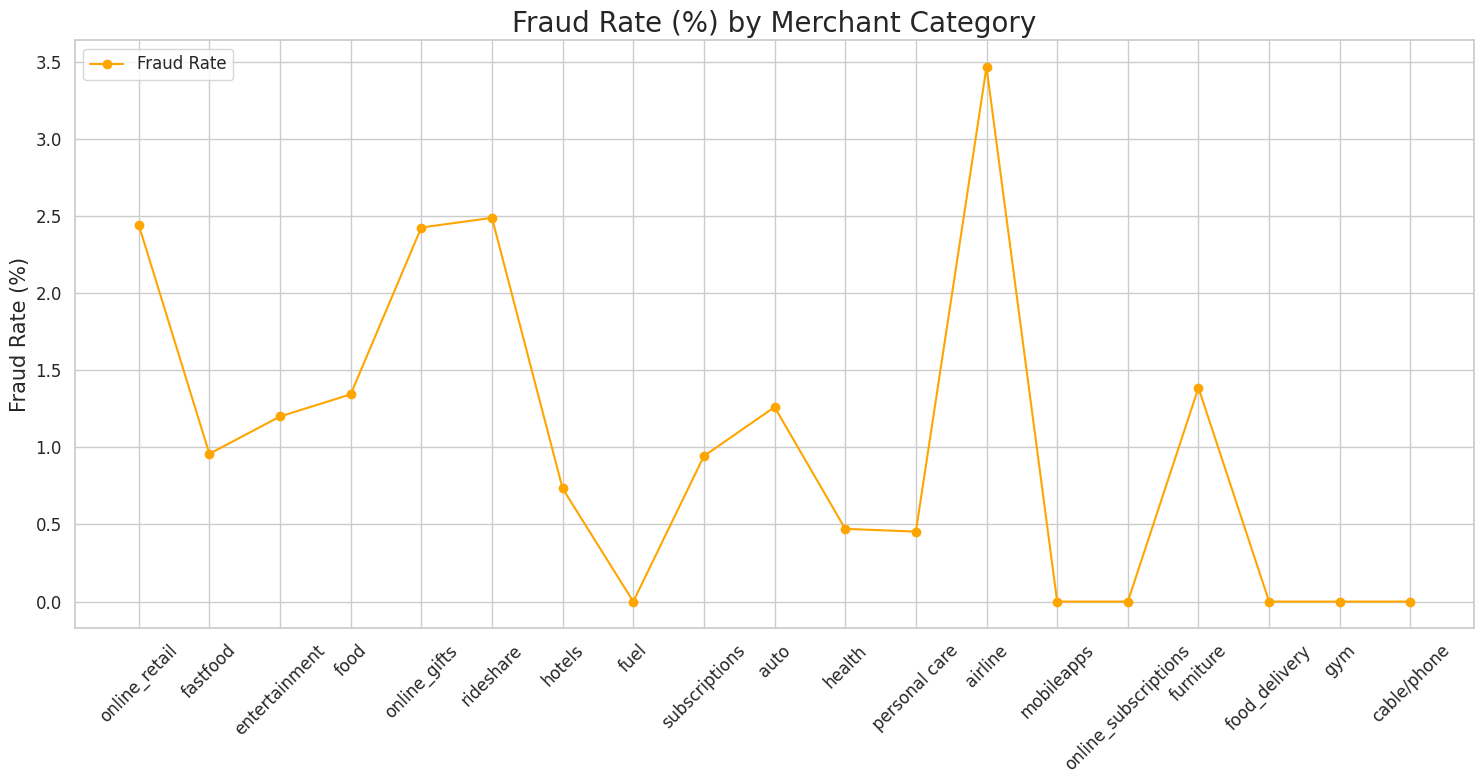

In [29]:
# line plot: fraud rate by Merchant Category

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))

# plotting line for fraud rate
ax.plot(mc_fraud_summary["merchantCategoryCode"], mc_fraud_summary["fraud_rate"], linestyle='-', marker = 'o', color = 'orange', label="Fraud Rate")

ax.set_ylabel('Fraud Rate (%)', fontsize=15)

plt.title("Fraud Rate (%) by Merchant Category", loc='center',fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Adding legends for both y-axes
ax.legend(loc="upper left", fontsize=12)

# Adjust layout to prevent overlap
f.tight_layout()

# Display plot
plt.show()

**Observations:**



1.   Online Retail shopping, Fast food and Entertainment seems to be the top 3 spending categories for the customers.
2.   Airline transactions seems to have the most number of fraudlent transactions with almost 3.5% of transactions flagged as Fraud. Online retail, Online gifts and rideshare also have higher fraud rate with almost 2.5% of fraud transactions.



**3.4 Inspecting Transaction Type**

In [30]:
tran_df = df['transactionType'].value_counts().reset_index(drop=False)
tran_df.columns=['TransactionType','Frequency']
tran_df = pd.DataFrame(tran_df)
tran_df

,TransactionType,Frequency
0,PURCHASE,745193
1,REVERSAL,20303
2,ADDRESS_VERIFICATION,20169


Text(0, 0.5, 'Frequency')

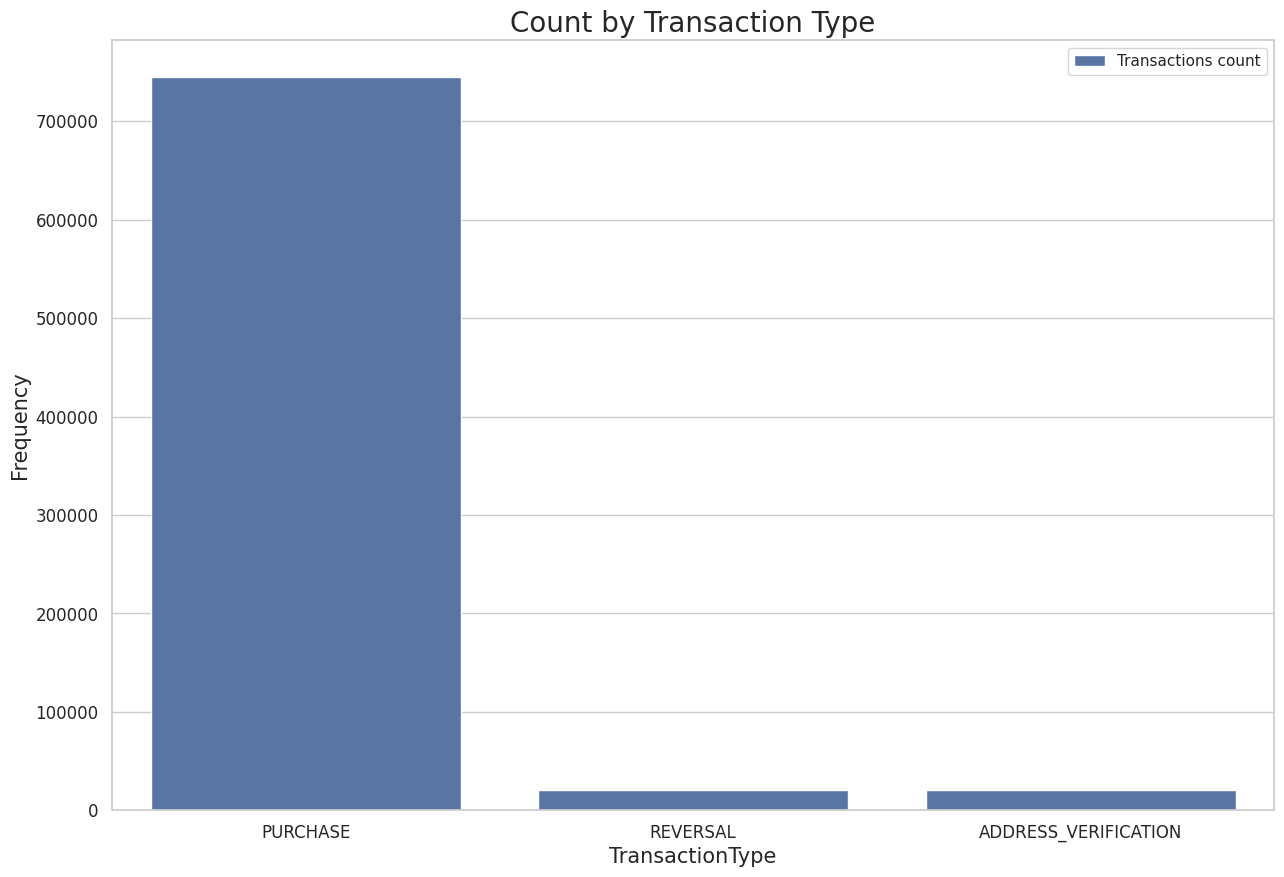

In [31]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# plotting a bar plot
bar1 = sns.barplot(x="TransactionType", y="Frequency", data=tran_df, label="Transactions count")

# formatting tick size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# setting title and label
plt.title("Count by Transaction Type", loc='center',fontsize=20)
plt.xlabel('TransactionType',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

In [32]:
# inspecting ADDRESS_VERIFICATION Transaction Type
df[df['transactionType']=='ADDRESS_VERIFICATION'].transactionAmount.sum()

0.0

In [33]:
df[df['transactionType']=='ADDRESS_VERIFICATION'].isFraud.sum()

116

**Observations:**



1.   Few transactions are reversals and few more are address verifications which are different from actual pruchases made by customer.
2. All address verification transactions have transaction amount = 0 indicating it's not a valid transaction.

**Approach:**

These are not actual transactions and hence can be removed from dataset before modelling to reduce noice.



**3.5 Inspecting Credit Limit**

In [34]:
# unique Credit Limit
print(f"Number of unique Credit Limits: {df['creditLimit'].nunique()}")

Number of unique Credit Limits: 10


In [35]:
# calculating fraud rate and total transaction volume for each "Credit Limit"

cl_fraud_summary = df.groupby('creditLimit').agg(
    total_transactions=('isFraud', 'count'),
    total_fraud=('isFraud', 'sum')
)

cl_fraud_summary['fraud_rate'] = (cl_fraud_summary['total_fraud'] / cl_fraud_summary['total_transactions'])*100
cl_fraud_summary = cl_fraud_summary.reset_index()
cl_fraud_summary = cl_fraud_summary.sort_values(by='creditLimit')
cl_fraud_summary = pd.DataFrame(cl_fraud_summary)
cl_fraud_summary

,creditLimit,total_transactions,total_fraud,fraud_rate
0,250,34025,407,1.196179
1,500,27097,465,1.716057
2,1000,36430,546,1.498765
3,2500,75429,1116,1.479537
4,5000,201863,3527,1.747225
5,7500,97913,1290,1.317496
6,10000,56889,766,1.346482
7,15000,139307,2545,1.826900
8,20000,68629,914,1.331799
9,50000,48781,841,1.724032


Text(0, 0.5, 'Frequency')

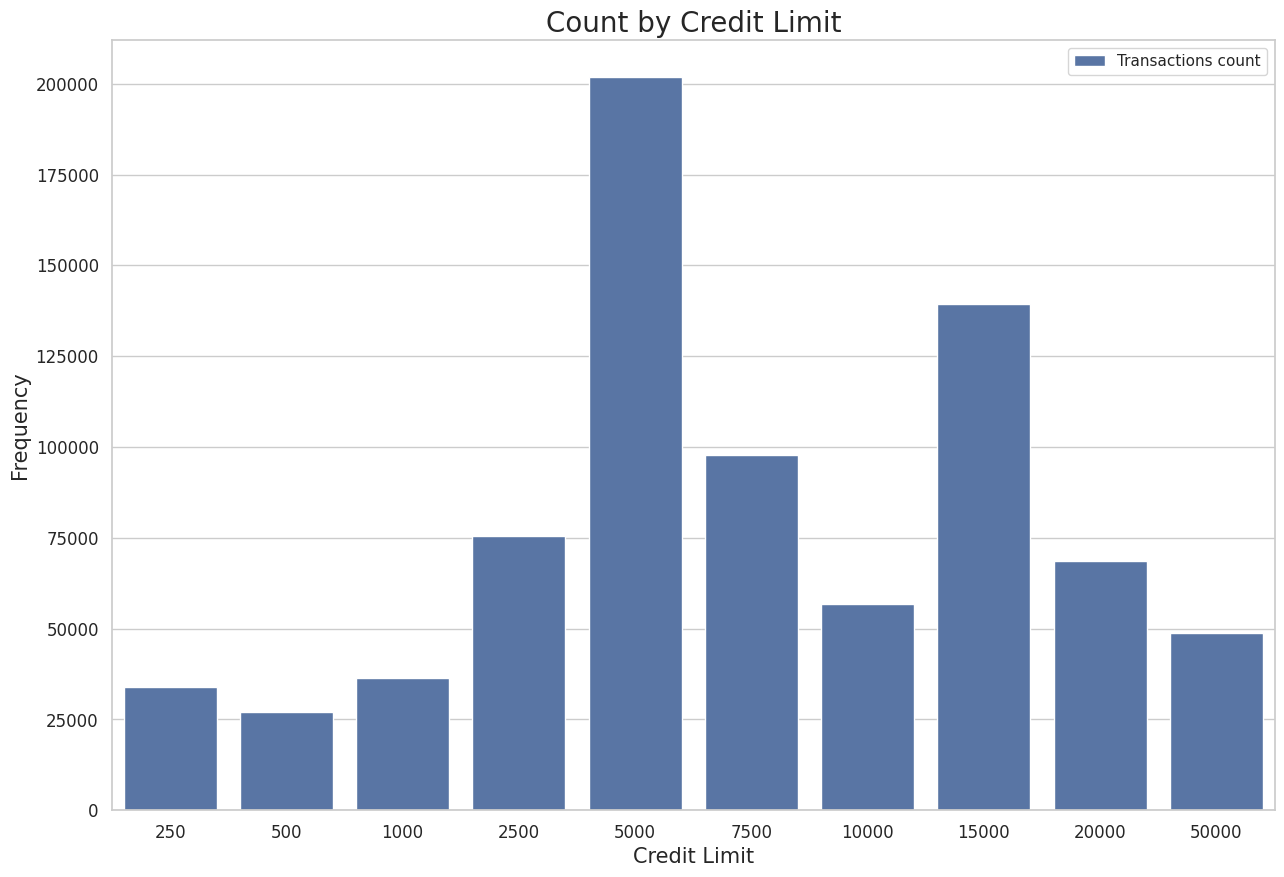

In [36]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# plotting a bar plot
bar1 = sns.barplot(x="creditLimit", y="total_transactions", data=cl_fraud_summary, label="Transactions count")

# formatting tick size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# setting title and label
plt.title("Count by Credit Limit", loc='center',fontsize=20)
plt.xlabel('Credit Limit',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

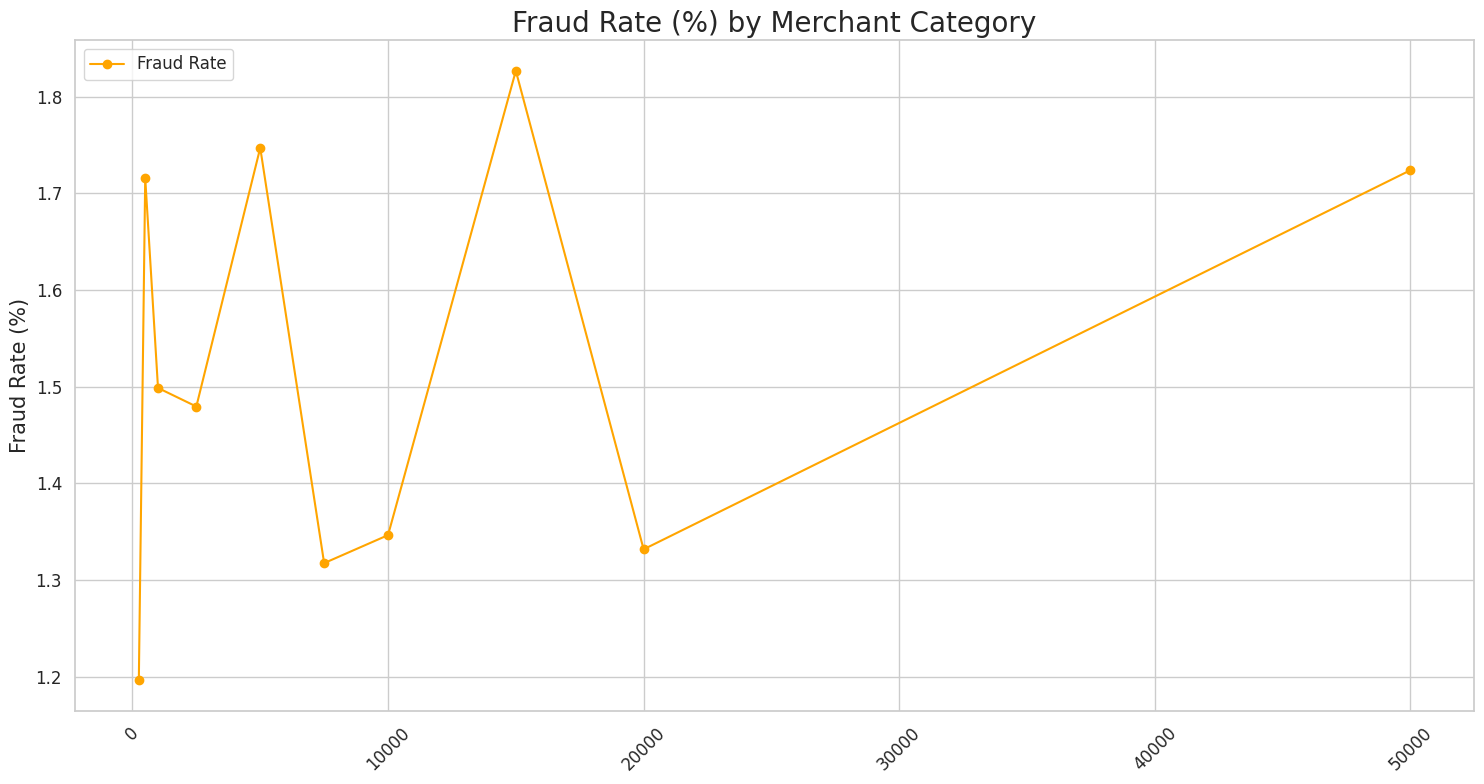

In [37]:
# line plot: fraud rate by Merchant Category

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))

# plotting line for fraud rate
ax.plot(cl_fraud_summary["creditLimit"], cl_fraud_summary["fraud_rate"], linestyle='-', marker = 'o', color = 'orange', label="Fraud Rate")

ax.set_ylabel('Fraud Rate (%)', fontsize=15)

# adding title and setting ticks
plt.title("Fraud Rate (%) by Credit Limit", loc='center',fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Adding legends for both y-axes
ax.legend(loc="upper left", fontsize=12)

# Adjust layout to prevent overlap
f.tight_layout()

# Display plot
plt.show()

**3.6 Inspecting boolean columns**

In [38]:
# inspecting cardPresent column

card_fraud_summary = df.groupby('cardPresent').agg(
    total_transactions=('isFraud', 'count'),
    total_fraud=('isFraud', 'sum')
)

card_fraud_summary['fraud_rate'] = (card_fraud_summary['total_fraud'] / card_fraud_summary['total_transactions'])*100
card_fraud_summary = card_fraud_summary.reset_index()
card_fraud_summary = pd.DataFrame(card_fraud_summary)
card_fraud_summary

,cardPresent,total_transactions,total_fraud,fraud_rate
0,False,433495,8962,2.067383
1,True,352868,3455,0.979120


In [39]:
# inspecting expirationDateKeyInMatch column

df['expirationDateKeyInMatch'].value_counts()

exp_fraud_summary = df.groupby('expirationDateKeyInMatch').agg(
    total_transactions=('isFraud', 'count'),
    total_fraud=('isFraud', 'sum')
)

exp_fraud_summary['fraud_rate'] = (exp_fraud_summary['total_fraud'] / exp_fraud_summary['total_transactions'])*100
exp_fraud_summary = exp_fraud_summary.reset_index()
exp_fraud_summary = pd.DataFrame(exp_fraud_summary)
exp_fraud_summary

,expirationDateKeyInMatch,total_transactions,total_fraud,fraud_rate
0,False,785320,12404,1.579484
1,True,1043,13,1.246405


**Observations:**



1.   In transactions where card was not present, fraud rate seems to be high (double) when compared to card transactions.
2.   In transactions where expiration key didn't match, fraud rate is slightly higher.
3. Both of the colummns could be good features for fraud prediction.



**3.7 Inspecting POS columns**

In [40]:
# inspecting posEntryMode column

df['posEntryMode'].value_counts()

pos_fraud_summary = df.groupby('posEntryMode').agg(
    total_transactions=('isFraud', 'count'),
    total_fraud=('isFraud', 'sum')
)

pos_fraud_summary['fraud_rate'] = (pos_fraud_summary['total_fraud'] / pos_fraud_summary['total_transactions'])*100
pos_fraud_summary = pos_fraud_summary.reset_index()
pos_fraud_summary = pd.DataFrame(pos_fraud_summary)
pos_fraud_summary

,posEntryMode,total_transactions,total_fraud,fraud_rate
0,02,195934,3421,1.745996
1,05,315035,2456,0.779596
2,09,236481,5659,2.393004
3,80,15283,240,1.570372
4,90,19576,372,1.900286


In [41]:
# inspecting posConditionCode column

df['posConditionCode'].value_counts()

posc_fraud_summary = df.groupby('posConditionCode').agg(
    total_transactions=('isFraud', 'count'),
    total_fraud=('isFraud', 'sum')
)

posc_fraud_summary['fraud_rate'] = (posc_fraud_summary['total_fraud'] / posc_fraud_summary['total_transactions'])*100
posc_fraud_summary = posc_fraud_summary.reset_index()
posc_fraud_summary = pd.DataFrame(posc_fraud_summary)
posc_fraud_summary

,posConditionCode,total_transactions,total_fraud,fraud_rate
0,01,628787,10230,NaN
1,08,149634,1936,NaN
2,99,7533,229,NaN


**3.8 Inspecting Target Variable**

In [42]:
# inspecting isFraud
df['isFraud'].value_counts()

,count
isFraud,
False,773946
True,12417


In [43]:
print(f"% of Fraudulent transactions: {(12417/786363)*100:.2f}%")

% of Fraudulent transactions: 1.58%


**Observations:**

The number of Fraud instances in the dataset is very less compared to non fraud instances which indicates the imbalanced nature of data.

**Approach:**

To combat class imbalance, i'm use techniques like Oversampling or Undersampling to improve model's predictive power and performance.

# **4. Data Preprocessing**

**4.1 Inspecting reversal transactions**

Approach 1: Transactions where Transaction Type == REVERSAL

In [44]:
reversal_df = df[df['transactionType']=='REVERSAL']

In [45]:
reversal_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
39,574788567,574788567,2500,2200.98,2016-05-24T01:38:03,215.13,Convenient Tire,US,US,09,01,auto,10/2021,2015-10-13,2015-10-13,206,206,8522,REVERSAL,NaN,299.02,NaN,NaN,NaN,True,NaN,NaN,False,False
73,574788567,574788567,2500,2432.72,2016-10-07T10:23:57,3.87,Eazy Repair,US,US,05,01,auto,10/2022,2015-10-13,2015-10-13,579,579,4219,REVERSAL,NaN,67.28,NaN,NaN,NaN,True,NaN,NaN,False,False
101,924729945,924729945,50000,49831.43,2016-10-19T14:01:45,168.57,discount.com,US,US,05,01,online_retail,11/2024,2014-07-25,2014-07-25,205,265,9459,REVERSAL,NaN,168.57,NaN,NaN,NaN,False,NaN,NaN,False,False
133,984504651,984504651,50000,46367.41,2016-01-16T09:53:15,450.74,Planet Fitness #849960,US,US,05,01,health,08/2028,2015-07-27,2015-07-27,640,640,8332,REVERSAL,NaN,3632.59,NaN,NaN,NaN,False,NaN,NaN,False,False
156,984504651,984504651,50000,41909.30,2016-01-25T20:39:15,81.73,AMC #724446,US,US,09,01,entertainment,12/2031,2015-07-27,2015-07-27,640,640,8332,REVERSAL,NaN,8090.70,NaN,NaN,NaN,True,NaN,NaN,False,False


In [46]:
reversal_df.shape[0]

20303

In [47]:
reversal_df['transactionAmount'].sum()

2821792.5

Approach 2: Transactions where reversal can be matched with purchase with same merchant, account, transaction amount where 'reversal' is followed by 'purchase'

In [48]:
# Separate purchases and reversals into two DataFrames
purchases = df[df['transactionType'] == 'PURCHASE']
reversals = df[df['transactionType'] == 'REVERSAL']

# Merge to find matching purchase and reversal pairs
merged = pd.merge(
    purchases, reversals,
    on=['accountNumber', 'merchantName', 'transactionAmount'],
    suffixes=('_purchase', '_reversal')
)

# Filter to ensure that the reversal happens after the purchase
reversed_transactions = merged[merged['transactionDateTime_reversal'] > merged['transactionDateTime_purchase']]

In [49]:
reversed_transactions[['accountNumber',  'merchantName', 'transactionAmount', 'transactionDateTime_purchase','transactionType_purchase','transactionDateTime_reversal','transactionType_reversal']]

,accountNumber,merchantName,transactionAmount,transactionDateTime_purchase,transactionType_purchase,transactionDateTime_reversal,transactionType_reversal
0,574788567,Convenient Tire,215.13,2016-05-24T01:35:33,PURCHASE,2016-05-24T01:38:03,REVERSAL
1,924729945,discount.com,168.57,2016-10-04T04:20:04,PURCHASE,2016-10-19T14:01:45,REVERSAL
2,984504651,1st Sandwitch Bar #801388,83.64,2016-01-06T04:08:06,PURCHASE,2016-02-04T00:14:42,REVERSAL
3,984504651,Planet Fitness #849960,450.74,2016-01-16T09:52:30,PURCHASE,2016-01-16T09:53:15,REVERSAL
4,984504651,AMC #724446,81.73,2016-01-17T08:13:08,PURCHASE,2016-01-25T20:39:15,REVERSAL
...,...,...,...,...,...,...,...
18138,205026043,Lyft,56.26,2016-09-18T06:07:17,PURCHASE,2016-09-18T06:08:02,REVERSAL
18139,288358186,ebay.com,20.66,2016-08-02T18:42:42,PURCHASE,2016-08-28T11:21:32,REVERSAL
18140,638498773,KFC #928167,201.79,2016-01-01T19:45:47,PURCHASE,2016-01-01T19:48:03,REVERSAL
18141,638498773,Dunkin' Donuts #396342,86.14,2016-10-09T04:52:23,PURCHASE,2016-11-03T04:23:26,REVERSAL


In [50]:
reversed_transactions.shape[0]

17999

In [51]:
reversed_transactions['transactionAmount'].sum()

2701311.87

**Insights:**

**4.2 Inspecting Multi Swipe Transactions**

In [52]:
sorted_df = df.sort_values(by=['accountNumber', 'merchantName', 'transactionDateTime'], ascending=True)

sorted_df[['accountNumber',  'merchantName', 'transactionAmount', 'transactionDateTime']]

,accountNumber,merchantName,transactionAmount,transactionDateTime
541917,100088067,1st BBQ,200.12,2016-04-08T19:56:36
541962,100088067,1st Pub,95.11,2016-11-09T07:26:06
541920,100088067,1st Sandwitch Bar #758805,5.26,2016-05-06T02:54:01
541904,100088067,34th BBQ #412895,141.60,2016-02-03T04:48:54
541925,100088067,AMC #191138,304.15,2016-06-03T18:50:55
...,...,...,...,...
108113,999389635,Play Store,4.62,2016-10-23T16:47:41
108114,999389635,Play Store,4.62,2016-11-24T00:21:46
108115,999389635,Play Store,4.62,2016-12-24T05:19:30
108109,999389635,oldnavy.com,42.98,2016-08-04T20:27:36


In [53]:
sorted_df['transactionDateTime'] = pd.to_datetime(sorted_df['transactionDateTime'])

In [54]:
sorted_df['prev_transaction_amount'] = sorted_df.groupby('accountNumber')['transactionAmount'].shift(1)
sorted_df['prev_transaction_datetime'] = sorted_df.groupby('accountNumber')['transactionDateTime'].shift(1)

In [55]:
sorted_df.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,prev_transaction_amount,prev_transaction_datetime
541917,100088067,100088067,50000,49953.81,2016-04-08 19:56:36,200.12,1st BBQ,US,US,09,01,food,07/2029,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,46.19,NaN,NaN,NaN,True,NaN,NaN,False,False,NaN,NaT
541962,100088067,100088067,50000,49929.31,2016-11-09 07:26:06,95.11,1st Pub,US,US,02,01,food,04/2021,2014-01-09,2014-01-09,402,402,2077,PURCHASE,NaN,70.69,NaN,NaN,NaN,True,NaN,NaN,False,False,200.12,2016-04-08 19:56:36
541920,100088067,100088067,50000,49996.04,2016-05-06 02:54:01,5.26,1st Sandwitch Bar #758805,US,US,02,01,food,07/2033,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,3.96,NaN,NaN,NaN,True,NaN,NaN,False,False,95.11,2016-11-09 07:26:06
541904,100088067,100088067,50000,49933.93,2016-02-03 04:48:54,141.60,34th BBQ #412895,US,US,09,08,food,11/2030,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,66.07,NaN,NaN,NaN,True,NaN,NaN,False,False,5.26,2016-05-06 02:54:01
541925,100088067,100088067,50000,50000.00,2016-06-03 18:50:55,304.15,AMC #191138,US,US,02,01,entertainment,11/2032,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False,141.60,2016-02-03 04:48:54
541951,100088067,100088067,50000,48972.87,2016-09-29 03:23:32,485.92,AMC #552863,US,US,09,01,entertainment,03/2028,2014-01-09,2014-01-09,402,402,2077,PURCHASE,NaN,1027.13,NaN,NaN,NaN,True,NaN,NaN,False,False,304.15,2016-06-03 18:50:55
541958,100088067,100088067,50000,48803.33,2016-10-27 10:32:16,53.45,AMC #552863,US,US,02,01,entertainment,01/2024,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,1196.67,NaN,NaN,NaN,True,NaN,NaN,False,False,485.92,2016-09-29 03:23:32
541909,100088067,100088067,50000,49421.28,2016-02-21 01:14:56,71.35,AMC #724446,US,US,09,01,entertainment,03/2024,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,578.72,NaN,NaN,NaN,True,NaN,NaN,True,False,53.45,2016-10-27 10:32:16
541946,100088067,100088067,50000,49863.35,2016-09-18 06:13:27,55.04,AMC #724446,US,US,05,01,entertainment,07/2032,2014-01-09,2014-01-09,402,402,2077,PURCHASE,NaN,136.65,NaN,NaN,NaN,True,NaN,NaN,False,False,71.35,2016-02-21 01:14:56
541954,100088067,100088067,50000,49935.63,2016-10-10 07:15:50,249.19,AMC #724446,US,US,02,01,entertainment,08/2027,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,64.37,NaN,NaN,NaN,True,NaN,NaN,False,False,55.04,2016-09-18 06:13:27


In [56]:
time_window = timedelta(minutes=5)

sorted_df['isMultiSwipe'] = ((sorted_df['transactionAmount'] == sorted_df['prev_transaction_amount']) &
                            (sorted_df['transactionDateTime'] - sorted_df['prev_transaction_datetime'] <= time_window))

In [57]:
multi_swipe_df = sorted_df[sorted_df['isMultiSwipe'] == True]
multi_swipe_df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,prev_transaction_amount,prev_transaction_datetime,isMultiSwipe
541964,100088067,100088067,50000,49811.88,2016-11-20 08:00:04,22.32,AMC #79863,US,US,09,01,entertainment,06/2020,2014-01-09,2014-01-09,546,546,4615,REVERSAL,NaN,188.12,NaN,NaN,NaN,True,NaN,NaN,False,False,22.32,2016-11-20 07:57:05,True
541956,100088067,100088067,50000,49275.09,2016-10-16 18:01:02,411.35,Fresh Flowers,US,US,02,08,online_gifts,12/2019,2014-01-09,2014-01-09,402,402,2077,PURCHASE,NaN,724.91,NaN,NaN,NaN,False,NaN,NaN,False,False,411.35,2016-10-16 18:01:00,True
87920,100328049,100328049,5000,4605.10,2016-01-15 20:36:18,43.74,Lyft,US,US,09,08,rideshare,05/2027,2014-01-07,2014-01-07,206,206,2941,REVERSAL,NaN,394.90,NaN,NaN,NaN,False,NaN,NaN,False,False,43.74,2016-01-15 20:34:35,True
151518,100737756,100737756,250,177.98,2016-07-10 14:32:06,43.25,34th BBQ #166379,US,US,02,01,food,03/2029,2015-06-21,2015-06-21,463,463,4317,PURCHASE,NaN,72.02,NaN,NaN,NaN,True,NaN,NaN,False,False,43.25,2016-07-10 14:31:07,True
151427,100737756,100737756,250,-44.75,2016-01-18 01:55:28,693.50,Franks Deli,US,US,05,01,food,03/2025,2015-06-21,2015-06-21,463,463,4317,PURCHASE,NaN,294.75,NaN,NaN,NaN,True,NaN,NaN,False,False,693.50,2016-01-18 01:55:24,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569654,999257059,999257059,15000,14177.84,2016-01-14 16:51:22,47.58,Wall Street News,US,US,09,01,subscriptions,12/2019,2015-10-25,2015-10-25,959,959,8291,PURCHASE,NaN,822.16,NaN,NaN,NaN,False,NaN,NaN,False,False,47.58,2016-01-14 16:48:41,True
569751,999257059,999257059,15000,14322.20,2016-08-09 11:25:46,557.11,Washington Times,US,US,05,01,subscriptions,05/2032,2015-10-25,2015-10-25,959,959,8291,REVERSAL,NaN,677.80,NaN,NaN,NaN,False,NaN,NaN,False,False,557.11,2016-08-09 11:25:29,True
545536,999258704,999258704,5000,4246.82,2016-03-16 07:14:17,367.13,Uber,US,US,09,01,rideshare,03/2020,2015-12-22,2015-12-22,708,708,3757,REVERSAL,NaN,753.18,NaN,NaN,NaN,False,NaN,NaN,False,False,367.13,2016-03-16 07:13:48,True
545581,999258704,999258704,5000,4865.17,2016-09-02 03:33:07,72.93,gap.com,US,US,09,01,online_retail,05/2025,2015-12-22,2015-12-22,708,708,3757,REVERSAL,NaN,134.83,NaN,NaN,NaN,False,NaN,NaN,False,False,72.93,2016-09-02 03:31:57,True


In [58]:

multi_swipe_df.shape[0]

13492

In [59]:
multi_swipe_df.transactionAmount.sum()

1931990.04

In [60]:
sorted_df[(sorted_df['accountNumber']==100088067) & (sorted_df['transactionAmount']== 411.35)][['accountNumber',  'merchantName', 'transactionAmount', 'transactionDateTime','prev_transaction_amount','prev_transaction_datetime','transactionType','isMultiSwipe']]

,accountNumber,merchantName,transactionAmount,transactionDateTime,prev_transaction_amount,prev_transaction_datetime,transactionType,isMultiSwipe
541955,100088067,Fresh Flowers,411.35,2016-10-16 18:01:00,21.59,2016-09-02 03:40:54,PURCHASE,False
541956,100088067,Fresh Flowers,411.35,2016-10-16 18:01:02,411.35,2016-10-16 18:01:00,PURCHASE,True


In [61]:
sorted_df[(sorted_df['accountNumber']==100737756) & (sorted_df['transactionAmount']== 693.50)][['accountNumber',  'merchantName', 'transactionAmount', 'transactionDateTime','prev_transaction_amount','prev_transaction_datetime','transactionType','isMultiSwipe']]

,accountNumber,merchantName,transactionAmount,transactionDateTime,prev_transaction_amount,prev_transaction_datetime,transactionType,isMultiSwipe
151426,100737756,Franks Deli,693.5,2016-01-18 01:55:24,83.32,2016-12-11 20:11:14,PURCHASE,False
151427,100737756,Franks Deli,693.5,2016-01-18 01:55:28,693.50,2016-01-18 01:55:24,PURCHASE,True
151428,100737756,Franks Deli,693.5,2016-01-18 01:58:26,693.50,2016-01-18 01:55:28,PURCHASE,True


In [62]:
multi_swipe_df['isFraud'].value_counts()

,count
isFraud,
False,13259
True,233


In [63]:
multi_swipe_df['merchantCategoryCode'].value_counts()

,count
merchantCategoryCode,
online_retail,3721
fastfood,2141
entertainment,1513
food,1412
online_gifts,1179
rideshare,939
hotels,646
subscriptions,425
auto,385


## **5. Data Cleaning**

In [64]:
clean_df = sorted_df[sorted_df['isMultiSwipe'] == False]
clean_df = clean_df[clean_df['transactionType'] == 'PURCHASE']

In [65]:
clean_df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,prev_transaction_amount,prev_transaction_datetime,isMultiSwipe
541917,100088067,100088067,50000,49953.81,2016-04-08 19:56:36,200.12,1st BBQ,US,US,09,01,food,07/2029,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,46.19,NaN,NaN,NaN,True,NaN,NaN,False,False,NaN,NaT,False
541962,100088067,100088067,50000,49929.31,2016-11-09 07:26:06,95.11,1st Pub,US,US,02,01,food,04/2021,2014-01-09,2014-01-09,402,402,2077,PURCHASE,NaN,70.69,NaN,NaN,NaN,True,NaN,NaN,False,False,200.12,2016-04-08 19:56:36,False
541920,100088067,100088067,50000,49996.04,2016-05-06 02:54:01,5.26,1st Sandwitch Bar #758805,US,US,02,01,food,07/2033,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,3.96,NaN,NaN,NaN,True,NaN,NaN,False,False,95.11,2016-11-09 07:26:06,False
541904,100088067,100088067,50000,49933.93,2016-02-03 04:48:54,141.60,34th BBQ #412895,US,US,09,08,food,11/2030,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,66.07,NaN,NaN,NaN,True,NaN,NaN,False,False,5.26,2016-05-06 02:54:01,False
541925,100088067,100088067,50000,50000.00,2016-06-03 18:50:55,304.15,AMC #191138,US,US,02,01,entertainment,11/2032,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False,141.60,2016-02-03 04:48:54,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108113,999389635,999389635,5000,4674.08,2016-10-23 16:47:41,4.62,Play Store,US,US,05,01,mobileapps,04/2033,2015-10-09,2015-10-09,140,140,3991,PURCHASE,NaN,325.92,NaN,NaN,NaN,False,NaN,NaN,False,False,4.62,2016-09-22 13:58:30,False
108114,999389635,999389635,5000,4694.46,2016-11-24 00:21:46,4.62,Play Store,US,US,05,01,mobileapps,04/2033,2015-10-09,2015-10-09,140,140,3991,PURCHASE,NaN,305.54,NaN,NaN,NaN,False,NaN,NaN,False,False,4.62,2016-10-23 16:47:41,False
108115,999389635,999389635,5000,4714.84,2016-12-24 05:19:30,4.62,Play Store,US,US,05,01,mobileapps,04/2033,2015-10-09,2015-10-09,140,140,3991,PURCHASE,NaN,285.16,NaN,NaN,NaN,False,NaN,NaN,False,False,4.62,2016-11-24 00:21:46,False
108109,999389635,999389635,5000,4943.92,2016-08-04 20:27:36,42.98,oldnavy.com,US,US,09,01,online_retail,07/2023,2015-10-09,2015-10-09,140,140,3991,PURCHASE,NaN,56.08,NaN,NaN,NaN,False,NaN,NaN,False,False,4.62,2016-12-24 05:19:30,False


In [66]:
clean_df.drop(columns=['prev_transaction_amount', 'prev_transaction_datetime', 'isMultiSwipe','recurringAuthInd','posOnPremises',
                       'merchantZip','merchantState','merchantCity','echoBuffer'], inplace=True)

In [67]:
clean_df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [68]:
clean_df = clean_df.dropna()

In [69]:
clean_df.shape

(729280, 23)


# **6. Feature Engineering**

In [70]:
# creating a copy of the cleaned dataframe - i will be using this to generate new features
transform_df = clean_df.copy()

**6.1 Credit Utilization Ratio**

**Rationale:**
1.   The columns - 'currentBalance', 'creditLimit' and 'availableMoney' are related, where creditLimit = currentBalance + availableMoney. Given this relationship, it's highly likely that these columns could be correlated.
**Approach:**
2.    To reduce redundancy, i will remove one of the columns and introduce a new feature where "utilization_ratio = currentBalance/creditLimit".
**Justification:**
3. It gives a measure of how much credit is being utilized which could be a good predictor of fraud.



In [71]:
# introducing a new feature - credit utilization ratio
transform_df['utilization_ratio'] = transform_df['currentBalance'] / transform_df['creditLimit']

**6.2 CVV Match**

**Rationale:**
1.   cardCVV and enteredCVV - both columns have lot of similar values. Given this relationship, it's highly likely that these columns could be correlated.
**Approach:**
2.    Create a new feature - cvv_match (binary flag), to check if cardCVV and enteredCVV match. A match indicates the CVV entered was correct, while mismatch suggests an incorrect entry.
**Justification:**
3. Mismatch between these values could be a good predictor of fraud, as incorrect CVV entry could indicate higher fraud risk.


In [72]:
# introducing a new binary feature - cvv_match
transform_df['cvv_match'] = transform_df['cardCVV'] == transform_df['enteredCVV']

**6.3 Country Match**

**Rationale:**
1.   The acqCountry (acquiring bank’s country) and merchantCountryCode (merchant’s country) columns often have matching values, indicating they may be correlated.

**Approach:**
2.    Create a new feature - country_match (binary flag), to check if these columns match. A match suggests a domestic (in-country) transaction, while a mismatch indicates an international transaction.

**Justification:**
3.  Mismatch could be a strong predictor of fraud, as international transactions may often carry higher fraud risk.

In [73]:
# introducing a new binary feature - country_match
transform_df['country_match'] = transform_df['acqCountry'] == transform_df['merchantCountryCode']

**6.4 recent_account_open and recent_address_change**

**Rationale:**
1.   Account open date and Last address change date does not provide meaningful information for the model.

**Approach:**
2.    Create 2 new features - recent_account_open (binary flag) to check if transaction happened within 30 days of account opening and recent_address_change (binary flag) to check if transaction happened within 30 days of last address change.

**Justification:**
3.  'False' could be a strong predictor of fraud, as new accounts and recent address change transactions may often carry higher fraud risk.

In [74]:
# convert to datetime
transform_df['accountOpenDate'] = pd.to_datetime(transform_df['accountOpenDate'])
transform_df['dateOfLastAddressChange'] = pd.to_datetime(transform_df['dateOfLastAddressChange'])

In [75]:
# define threshold
days_threshold = pd.Timedelta(days=30)

# check if account opened within the last 30 days of the transaction
transform_df['recent_account_open'] = (transform_df['transactionDateTime'] - transform_df['accountOpenDate']) <= days_threshold

# check if address changed within the last 30 days of the transaction
transform_df['recent_address_change'] = (transform_df['transactionDateTime'] - transform_df['dateOfLastAddressChange']) <= days_threshold

**6.5 transaction_hour and transaction_day_of_week**

**Rationale:**
1.   Transaction date date does not provide meaningful information for the model.

**Approach:**
2.    Create 2 new features - transaction_hour and transaction_day_of_week to create more meanigful features.

**Justification:**
3.  'False' could be a strong predictor of fraud, as new accounts and recent address change transactions may often carry higher fraud risk.

In [76]:
# transaction hour
transform_df['transaction_hour'] = transform_df['transactionDateTime'].dt.hour

In [77]:
# transaction day of week
transform_df['transaction_day_of_week'] = transform_df['transactionDateTime'].dt.dayofweek

In [78]:
# dropping unnecessary columns after feature engineering
transform_df.drop(columns=['accountNumber','customerId','merchantName','cardLast4Digits','accountOpenDate','dateOfLastAddressChange','cardCVV','currentExpDate','enteredCVV','currentBalance','transactionDateTime','transactionType','acqCountry'], inplace=True)

In [79]:
# inspecting the dataframe after creating features
transform_df.head()

,creditLimit,availableMoney,transactionAmount,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,cardPresent,expirationDateKeyInMatch,isFraud,utilization_ratio,cvv_match,country_match,recent_account_open,recent_address_change,transaction_hour,transaction_day_of_week
541917,50000,49953.81,200.12,US,09,01,food,True,False,False,0.000924,True,True,False,False,19,4
541962,50000,49929.31,95.11,US,02,01,food,True,False,False,0.001414,True,True,False,False,7,2
541920,50000,49996.04,5.26,US,02,01,food,True,False,False,0.000079,True,True,False,False,2,4
541904,50000,49933.93,141.60,US,09,08,food,True,False,False,0.001321,True,True,False,False,4,2
541925,50000,50000.00,304.15,US,02,01,entertainment,True,False,False,0.000000,True,True,False,False,18,4


In [80]:
# final shape
transform_df.shape

(729280, 17)

In [81]:
transform_df.columns

Index(['creditLimit', 'availableMoney', 'transactionAmount',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'cardPresent', 'expirationDateKeyInMatch',
       'isFraud', 'utilization_ratio', 'cvv_match', 'country_match',
       'recent_account_open', 'recent_address_change', 'transaction_hour',
       'transaction_day_of_week'],
      dtype='object')

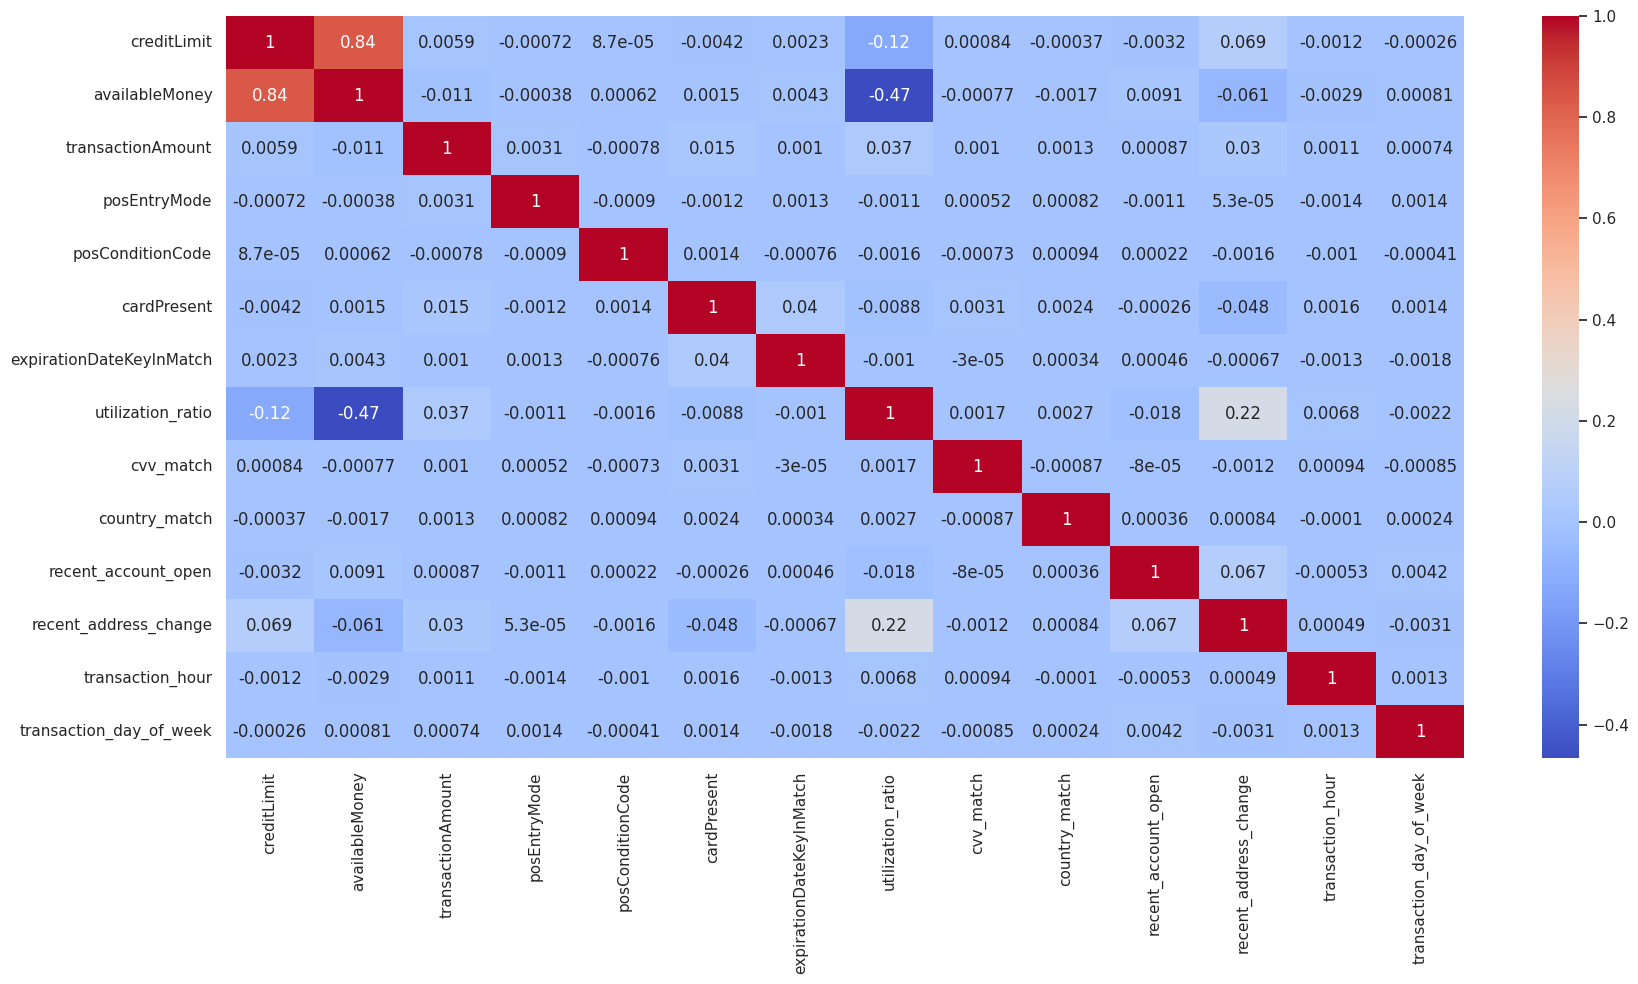

In [82]:
# correlation heatmap
corr_df = transform_df[['creditLimit', 'availableMoney', 'transactionAmount', 'posEntryMode',
            'posConditionCode','cardPresent', 'expirationDateKeyInMatch',
       'utilization_ratio', 'cvv_match', 'country_match',
       'recent_account_open', 'recent_address_change', 'transaction_hour',
       'transaction_day_of_week']]
fig = plt.figure(figsize=(18,10))
sns.heatmap(corr_df.corr(),annot=True,cmap="coolwarm")
plt.tight_layout()

In [83]:
# dropping columns with correlation
transform_df.drop(columns=['creditLimit','recent_account_open','expirationDateKeyInMatch','country_match'], inplace=True)

# **7. Feature Transformation**

**7.1 One Hot Encoding**

In [84]:
#importing necessary libraries for modelling

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, make_scorer, confusion_matrix, accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb

In [85]:
# One-hot encoding for categorical columns
categorical_columns = ['merchantCountryCode', 'merchantCategoryCode', 'posEntryMode', 'posConditionCode']
transform_df = pd.get_dummies(transform_df, columns=categorical_columns, drop_first=True)

# encoding for boolean columns
boolean_columns = ['cardPresent', 'cvv_match', 'recent_address_change','isFraud']

transform_df[boolean_columns] = transform_df[boolean_columns].astype(int)

In [86]:
transform_df.head()

,availableMoney,transactionAmount,cardPresent,isFraud,utilization_ratio,cvv_match,recent_address_change,transaction_hour,transaction_day_of_week,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_08,posConditionCode_99
541917,49953.81,200.12,1,0,0.000924,1,0,19,4,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
541962,49929.31,95.11,1,0,0.001414,1,0,7,2,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
541920,49996.04,5.26,1,0,0.000079,1,0,2,4,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
541904,49933.93,141.60,1,0,0.001321,1,0,4,2,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
541925,50000.00,304.15,1,0,0.000000,1,0,18,4,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**7.2 Removing Target variables and Features**

In [87]:
# removing target variable and reassigning it to y
X=transform_df.drop('isFraud',axis=1)
y=transform_df['isFraud']

**7.3 Scaling numerical columns**

In [88]:
# Define continuous and categorical columns
continuous_cols = ['availableMoney', 'transactionAmount', 'utilization_ratio']
categorical_cols = [col for col in X.columns if col not in continuous_cols]

# Scale only the continuous columns
scaler = RobustScaler()
X_continuous_scaled = scaler.fit_transform(X[continuous_cols])

# Convert categorical columns to numpy format
X_categorical = X[categorical_cols].values

# Concatenate scaled continuous features with categorical features
X_scaled = np.hstack((X_categorical, X_continuous_scaled))

**7.4 Test Train Split**

In [89]:
# perform train test split with stratification
# Split data into train+validation (80%) and holdout test set (20%)
X_train_val, X_holdout, y_train_val, y_holdout = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Further split the training data into actual training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

**7.5 Using SMOTE to handle class imbalance**

In [90]:
# applying SMOTE to minority class
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [91]:
#X_train_resampled.shape

In [92]:
#y_train_resampled.shape

In [93]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy=0.1, random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [94]:
X_train_resampled.shape

(75262, 35)

In [95]:
y_train_resampled.shape

(75262,)

In [96]:
# Check new class distribution
from collections import Counter
print("Class distribution after SMOTEENN:", Counter(y_train_resampled))

Class distribution after SMOTEENN: Counter({0: 68420, 1: 6842})


# **8. Modelling**

**8.1 Logistic Regression**

In [97]:
logit = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1000)

In [98]:
param_grid = {
    'C': [1, 10, 100, 200, 500],
    'penalty': ['l1', 'l2']
}

In [99]:
# Using F1 Score as the scoring metric for imbalanced data
logit_clf = GridSearchCV(logit, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
logit_clf.fit(X_train_resampled, y_train_resampled)

# Display the best parameters from Grid Search
print("Best Parameters from Grid Search:", logit_clf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters from Grid Search: {'C': 1, 'penalty': 'l2'}


In [100]:
# Use the best parameters to initialize Logistic Regression
best_logit = LogisticRegression(
    penalty=logit_clf.best_params_['penalty'],
    C=logit_clf.best_params_['C'],
    class_weight='balanced',
    solver='liblinear',
    max_iter=1000
)
best_logit.fit(X_train_val, y_train_val)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   solver='liblinear')

In [101]:
# Predictions on the test set
y_pred = best_logit.predict(X_val)

# Classification report
print("Classification Report:\n", classification_report(y_val, y_pred))

# Accuracy
print("Test Accuracy: {:.4f}".format(accuracy_score(y_val, y_pred)))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.65      0.78    143575
           1       0.03      0.71      0.06      2281

    accuracy                           0.65    145856
   macro avg       0.51      0.68      0.42    145856
weighted avg       0.98      0.65      0.77    145856

Test Accuracy: 0.6461


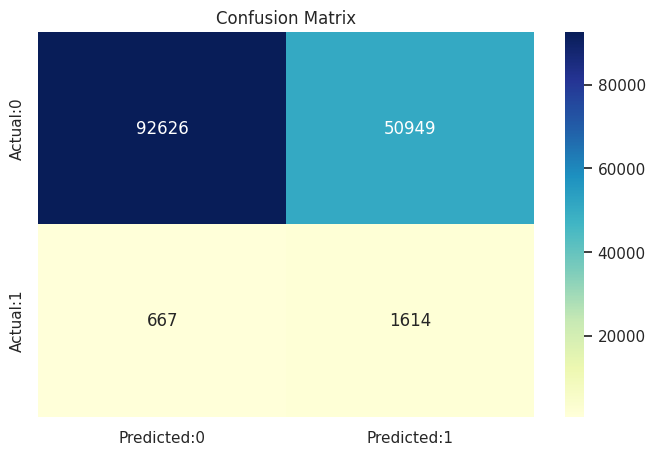

In [102]:
cm = confusion_matrix(y_val, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plotting Confusion Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.show()

Precision-Recall AUC: 0.0503


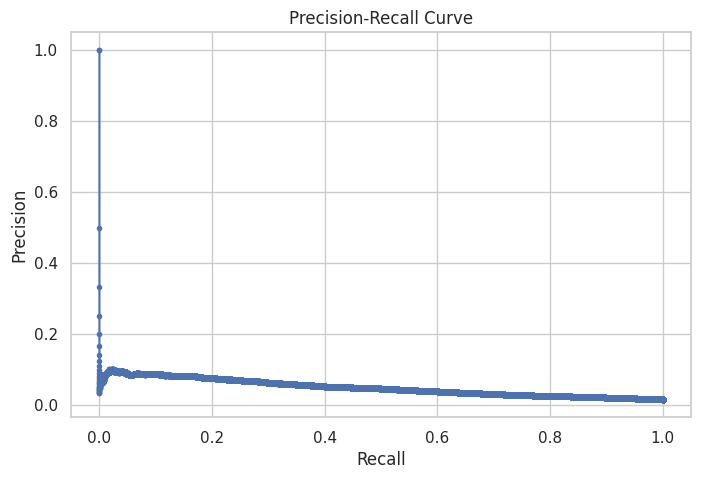

In [103]:
# Predicted probabilities for the positive class
y_scores = best_logit.predict_proba(X_val)[:, 1]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_val, y_scores)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

Classification Report on Holdout Set:
               precision    recall  f1-score   support

           0       0.99      0.64      0.78    143575
           1       0.03      0.70      0.06      2281

    accuracy                           0.65    145856
   macro avg       0.51      0.67      0.42    145856
weighted avg       0.98      0.65      0.77    145856

Holdout Set Accuracy: 0.645787626151821


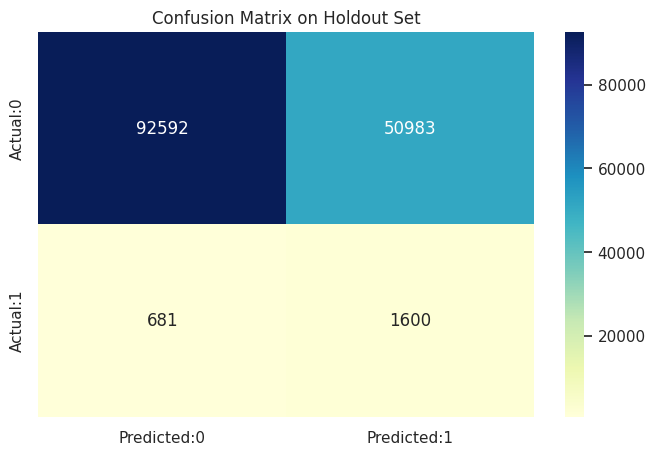

In [104]:
# Make predictions on the holdout set
y_holdout_pred = best_logit.predict(X_holdout)

# Classification report
print("Classification Report on Holdout Set:\n", classification_report(y_holdout, y_holdout_pred))

# Accuracy on holdout
print("Holdout Set Accuracy:", accuracy_score(y_holdout, y_holdout_pred))

# Confusion Matrix
cm = confusion_matrix(y_holdout, y_holdout_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix on Holdout Set")
plt.show()

**8.2 Random Forest**

In [105]:
rf = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

In [106]:
# define hyperparameter grid
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [15, 20, 25],
    'min_samples_split': [15, 20, 25],
    'class_weight': ['balanced', 'balanced_subsample']
}

In [107]:
# Using F1 Score as the scoring metric for imbalanced data
rf_clf = GridSearchCV(rf, param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
rf_clf.fit(X_train_resampled, y_train_resampled)

# Display best parameters
print("Best Parameters from Grid Search:", rf_clf.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters from Grid Search: {'class_weight': 'balanced_subsample', 'max_depth': 20, 'min_samples_split': 25, 'n_estimators': 200}


In [108]:
# Initialize with best parameters and train
best_rf = RandomForestClassifier(
    n_estimators=rf_clf.best_params_['n_estimators'],
    max_depth=rf_clf.best_params_['max_depth'],
    min_samples_split=rf_clf.best_params_['min_samples_split'],
    class_weight='balanced_subsample',
    random_state=42
)
best_rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       min_samples_split=25, n_estimators=200, random_state=42)

In [109]:
# Predictions on the test set
y_pred = best_rf.predict(X_val)

# Classification report
print("Classification Report:\n", classification_report(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91    143575
           1       0.05      0.48      0.09      2281

    accuracy                           0.84    145856
   macro avg       0.52      0.66      0.50    145856
weighted avg       0.98      0.84      0.90    145856



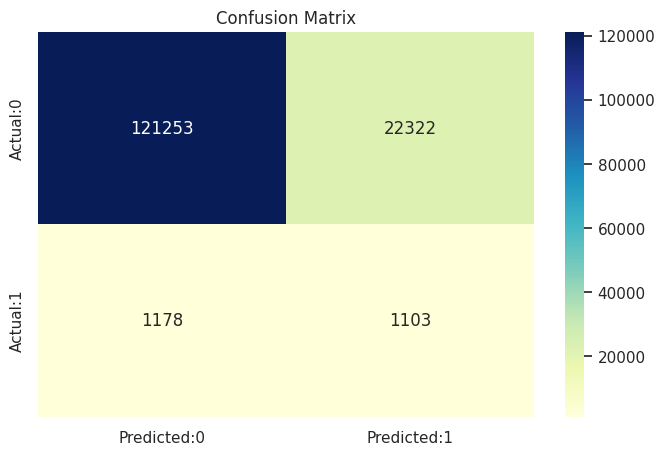

In [110]:
cm = confusion_matrix(y_val, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plotting Confusion Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.show()

Precision-Recall AUC: 0.0510


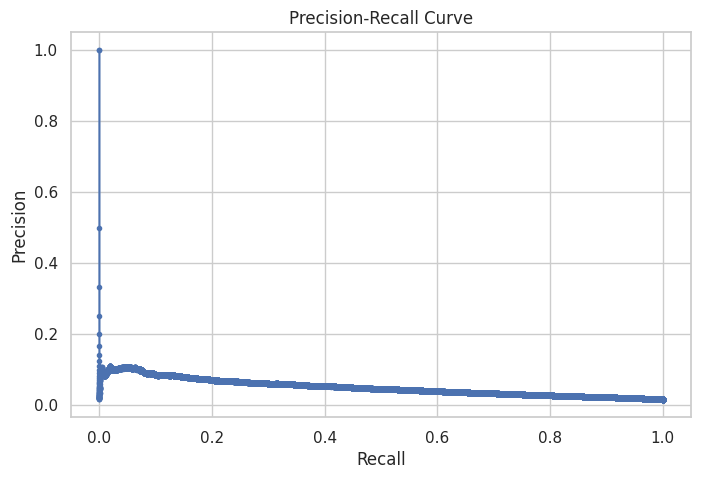

In [111]:
# Predicted probabilities for the positive class
y_scores = best_rf.predict_proba(X_val)[:, 1]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_val, y_scores)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

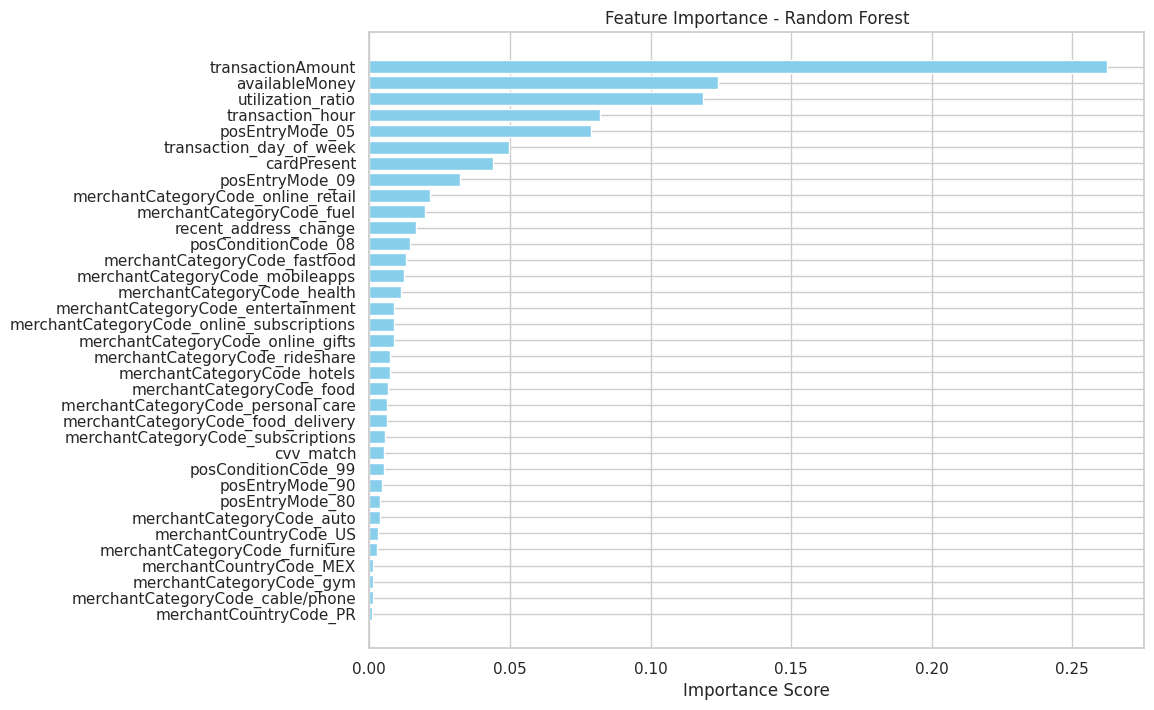

In [112]:
importances = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel('Importance Score')
plt.title('Feature Importance - Random Forest')
plt.show()

Classification Report on Holdout Set:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91    143575
           1       0.05      0.47      0.08      2281

    accuracy                           0.84    145856
   macro avg       0.52      0.66      0.50    145856
weighted avg       0.98      0.84      0.90    145856

Holdout Set Accuracy: 0.8400545743747257


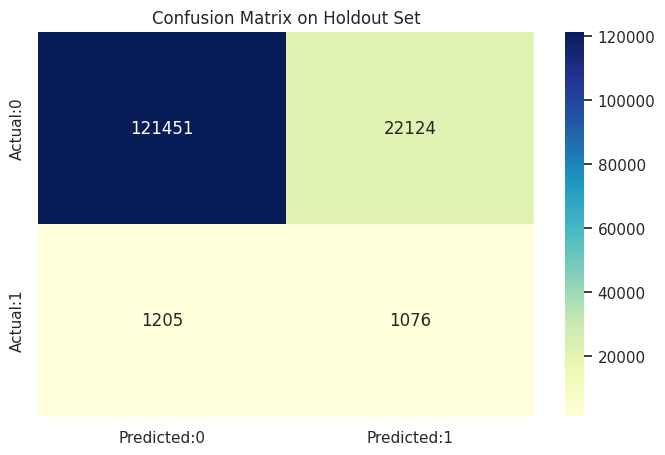

In [113]:
# Make predictions on the holdout set
y_holdout_pred = best_rf.predict(X_holdout)

# Classification report
print("Classification Report on Holdout Set:\n", classification_report(y_holdout, y_holdout_pred))

# Accuracy on holdout
print("Holdout Set Accuracy:", accuracy_score(y_holdout, y_holdout_pred))

# Confusion Matrix
cm = confusion_matrix(y_holdout, y_holdout_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix on Holdout Set")
plt.show()

**8.3 XGBoost**

In [114]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', tree_method='gpu_hist', random_state=42, eval_metric="aucpr")

In [115]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.05, 0.01, 0.1],
    'scale_pos_weight': [5, 10, 20],
    'tree_method': ['gpu_hist']
}

In [116]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 5, 'tree_method': 'gpu_hist'}


In [118]:
# Train with the best parameters from grid search
xgb_best = xgb.XGBClassifier(**best_params, objective='binary:logistic', random_state=42, eval_metric="aucpr")

# Fit the model with early stopping
xgb_best.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [119]:
# Predictions
y_pred_xgb = xgb_best.predict(X_val)

# Classification Report
print("Classification Report:\n", classification_report(y_val, y_pred_xgb))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93    143575
           1       0.05      0.43      0.10      2281

    accuracy                           0.87    145856
   macro avg       0.52      0.66      0.51    145856
weighted avg       0.98      0.87      0.92    145856



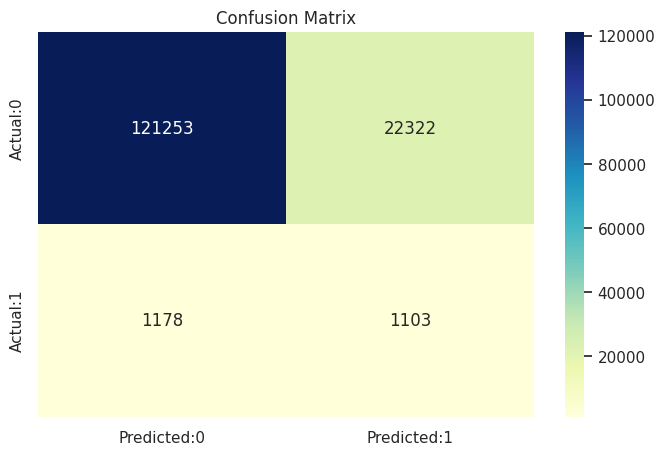

In [120]:
cm_xgb = confusion_matrix(y_val, y_pred)
conf_matrix_xgb = pd.DataFrame(data=cm_xgb, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plotting Confusion Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.show()

Precision-Recall AUC: 0.0558


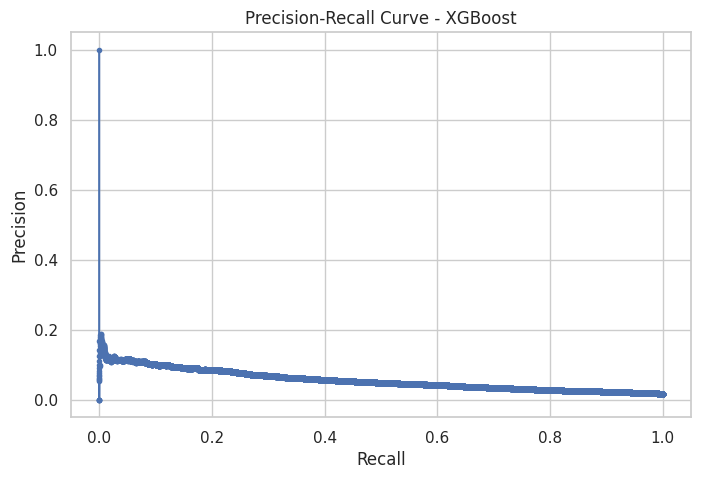

In [121]:
# Predicted probabilities for the positive class
y_pred_proba = xgb_best.predict_proba(X_val)[:, 1]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - XGBoost")
plt.show()

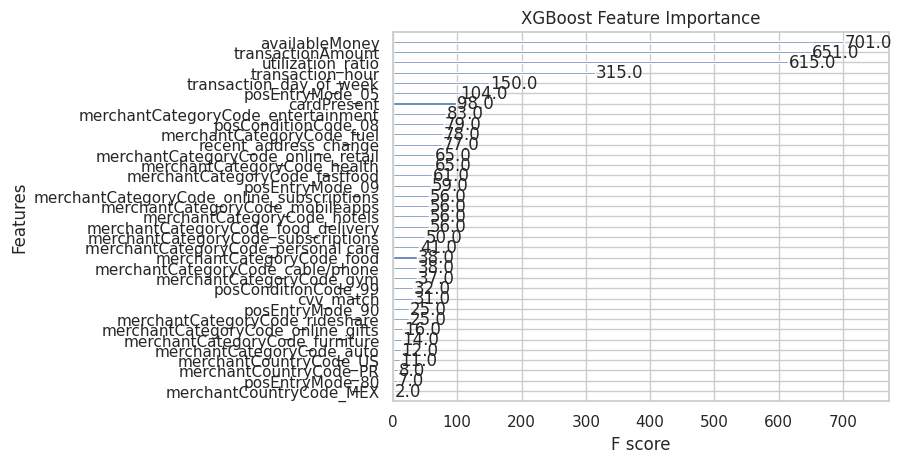

In [122]:
# Plot feature importance using XGBoost's plot_importance function
xgb.plot_importance(xgb_best, importance_type='weight')
plt.figure(figsize=(15, 10))
plt.title("XGBoost Feature Importance")
plt.show()

Classification Report on Holdout Set:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93    143575
           1       0.05      0.43      0.09      2281

    accuracy                           0.87    145856
   macro avg       0.52      0.65      0.51    145856
weighted avg       0.98      0.87      0.92    145856

Holdout Set Accuracy: 0.8710851799034665


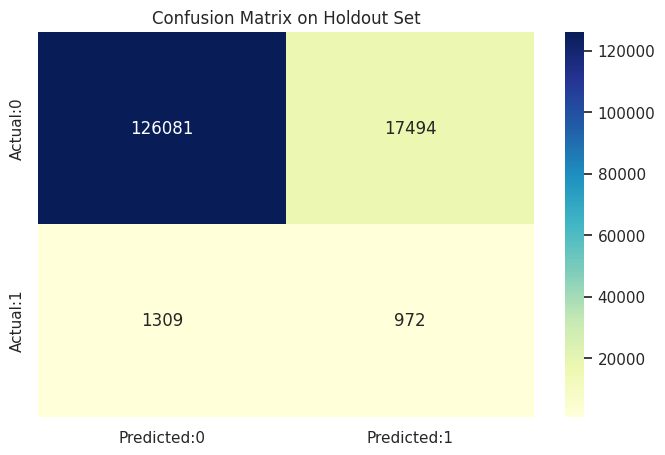

In [123]:
# Make predictions on the holdout set
y_holdout_pred = xgb_best.predict(X_holdout)

# Classification report
print("Classification Report on Holdout Set:\n", classification_report(y_holdout, y_holdout_pred))

# Accuracy on holdout
print("Holdout Set Accuracy:", accuracy_score(y_holdout, y_holdout_pred))

# Confusion Matrix
cm = confusion_matrix(y_holdout, y_holdout_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix on Holdout Set")
plt.show()

**8.4 LightBGM**

In [128]:
# Define LightGBM parameters
param_grid = {
    'num_leaves': [10,15, 20],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 150, 200],
    'scale_pos_weight': [y_train.value_counts()[0] / y_train.value_counts()[1]],
   # 'device': ['gpu']
}

# Initialize LightGBM classifier
lgb_model = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', verbose=-1, random_state=42)

In [129]:
# Grid search with cross-validation
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6842, number of negative: 430726
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 437568, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015636 -> initscore=-4.142392
[LightGBM] [Info] Start training from score -4.142392
Best parameters found:  {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 150, 'num_leaves': 15, 'scale_pos_weight': 62.95323004969307}


In [130]:
lgb_best = lgb.LGBMClassifier(**best_params, boosting_type='gbdt', objective='binary', random_state=42)
lgb_best.fit(X_train_val, y_train_val)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9123, number of negative: 574301
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 583424, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015637 -> initscore=-4.142355
[LightGBM] [Info] Start training from score -4.142355


LGBMClassifier(learning_rate=0.05, max_depth=10, n_estimators=150,
               num_leaves=15, objective='binary', random_state=42,
               scale_pos_weight=62.95323004969307)

In [131]:
# Make predictions
y_pred_lgb = lgb_best.predict(X_val)

# Classification report
print(classification_report(y_val, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83    143575
           1       0.04      0.70      0.07      2281

    accuracy                           0.71    145856
   macro avg       0.51      0.70      0.45    145856
weighted avg       0.98      0.71      0.81    145856



Classification Report on Holdout Set:
               precision    recall  f1-score   support

           0       0.99      0.71      0.83    143575
           1       0.03      0.66      0.07      2281

    accuracy                           0.71    145856
   macro avg       0.51      0.68      0.45    145856
weighted avg       0.98      0.71      0.81    145856

Holdout Set Accuracy: 0.7055794756472137


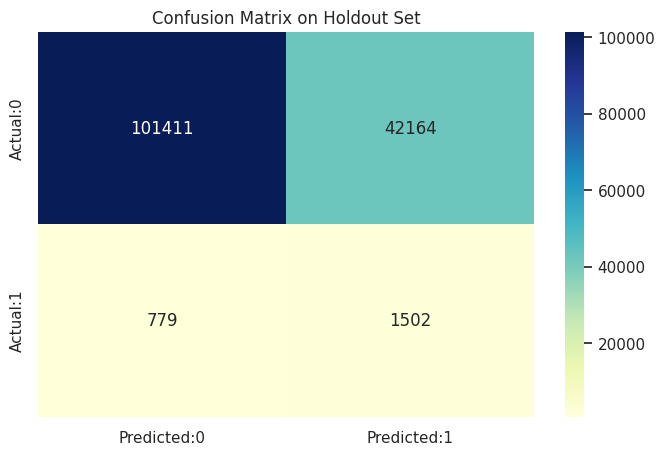

Precision-Recall AUC: 0.0152


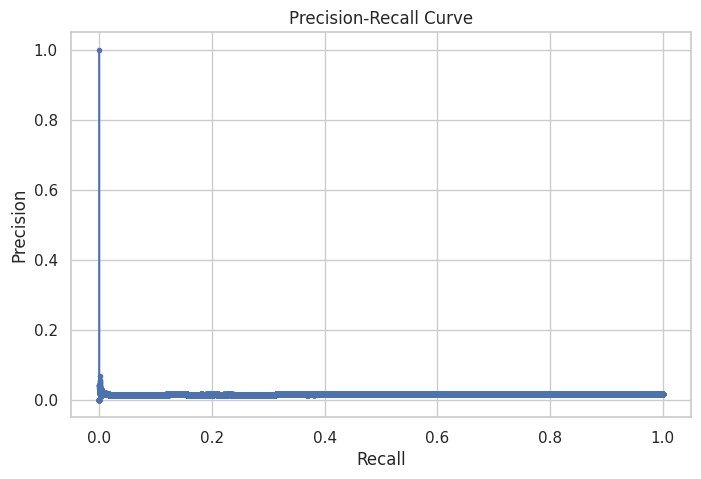

In [134]:
# Make predictions on the holdout set
y_holdout_pred = lgb_best.predict(X_holdout)

# Classification report
print("Classification Report on Holdout Set:\n", classification_report(y_holdout, y_holdout_pred))

# Accuracy on holdout
print("Holdout Set Accuracy:", accuracy_score(y_holdout, y_holdout_pred))

# Confusion Matrix
cm = confusion_matrix(y_holdout, y_holdout_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix on Holdout Set")
plt.show()

# Predicted probabilities for the positive class
y_scores = lgb_best.predict_proba(X_holdout)[:, 1]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_val, y_scores)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

**9. Model Evaluation**

**9.1 Using classification report to compare model performace**

In [135]:
models = {
    'Logistic Regression': best_logit,
    'Random Forest': best_rf,
    'XGBoost': xgb_best,
    'LightGBM': lgb_best
}

for model_name, model in models.items():
    # Train on the training + validation set
    model.fit(X_train, y_train)

    # Predict on the holdout set
    y_pred = model.predict(X_holdout)
    y_pred_proba = model.predict_proba(X_holdout)[:, 1]

    print(f"Model: {model_name}")
    print("Classification Report:")
    print(classification_report(y_holdout, y_pred))

    # Calculate AUC-ROC and AUC-PR
    roc_auc = roc_auc_score(y_holdout, y_pred_proba)
    precision, recall, _ = precision_recall_curve(y_holdout, y_pred_proba)
    pr_auc = auc(recall, precision)

    print(f"AUC-ROC: {roc_auc:.4f}")
    print(f"AUC-PR: {pr_auc:.4f}\n")

Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.64      0.78    143575
           1       0.03      0.70      0.06      2281

    accuracy                           0.64    145856
   macro avg       0.51      0.67      0.42    145856
weighted avg       0.98      0.64      0.77    145856

AUC-ROC: 0.7415
AUC-PR: 0.0480

Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94    143575
           1       0.05      0.35      0.09      2281

    accuracy                           0.89    145856
   macro avg       0.52      0.62      0.52    145856
weighted avg       0.97      0.89      0.93    145856

AUC-ROC: 0.7394
AUC-PR: 0.0453

Model: XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    143575
           1       0.11      0.00      0.

**9.2 Using confusion matrix to compare model performance**

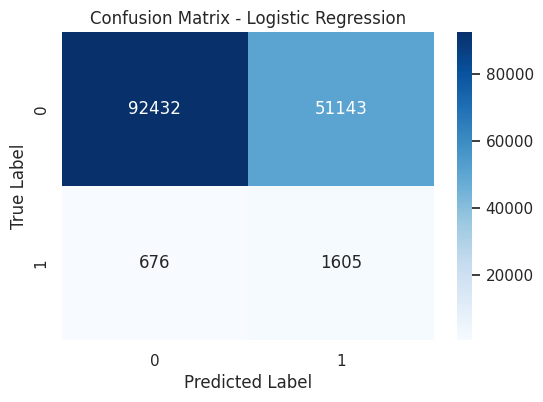

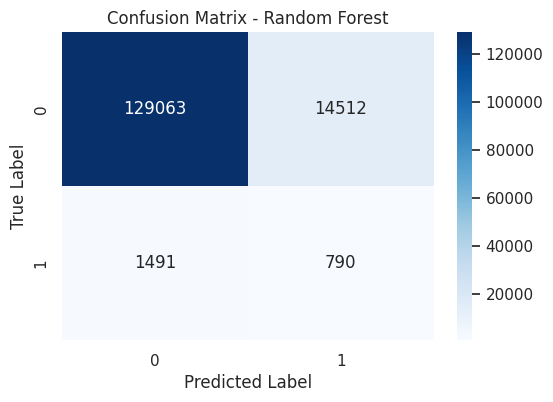

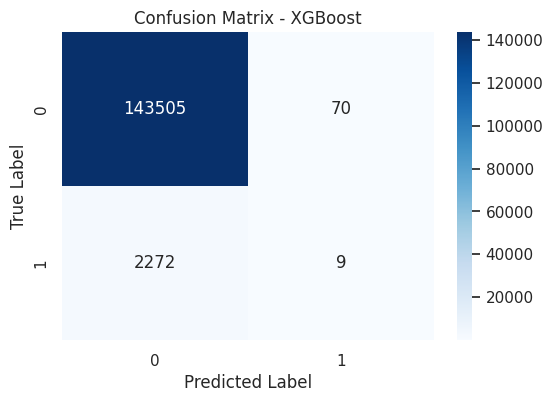

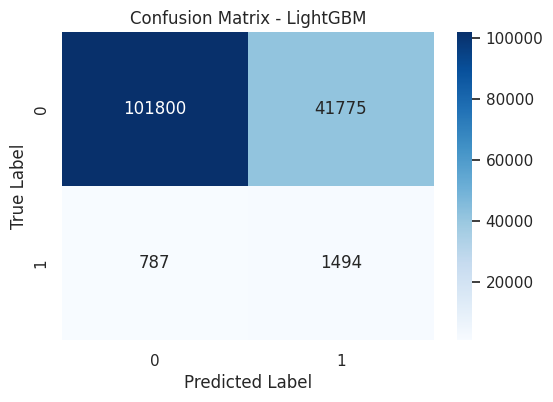

In [136]:
for model_name, model in models.items():
    y_pred = model.predict(X_holdout)
    cm = confusion_matrix(y_holdout, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

**9.3 Using ROC curve and Precision Recall curve**

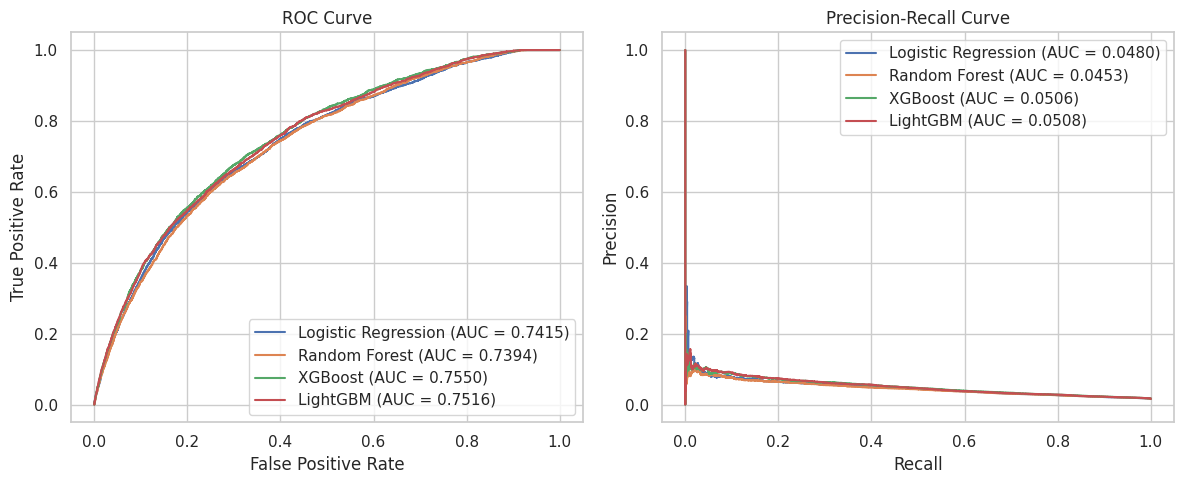

In [137]:
from sklearn.metrics import roc_curve, precision_recall_curve

plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_holdout)[:, 1]
    fpr, tpr, _ = roc_curve(y_holdout, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_holdout, y_pred_proba):.4f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Precision-Recall Curve
plt.subplot(1, 2, 2)
for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_holdout)[:, 1]
    precision, recall, _ = precision_recall_curve(y_holdout, y_pred_proba)
    plt.plot(recall, precision, label=f'{model_name} (AUC = {auc(recall, precision):.4f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

**10. Results**

**11. Next Steps**